General introduction

The purpose of this project is to look into Risk Management and how it relates to Knowledge Management . It tries to propose a conceptual framework called Knowledge-Based Risk Management that uses Knowledge Management procedures to improve the efficacy and probability of success in innovative Information Technology initiatives. It examines initiatives to integrate Knowledge Management processes into Risk Management processes by evaluating and interpreting relevant literature, as well as shedding light on integration with Risk Management in IT projects.
Risk management is becoming increasingly important in organizations because it helps reduce the likelihood and impact of IT project threats while also capturing opportunities that may arise over the IT project life cycle.
The practice of extracting specific information from textual sources and presenting it in a structured style is known as data extraction. It can be used on a variety of sources, including emails and web pages, as well as reports, presentations, legal documents, and scientific publications and for different purposes in our case to create a tool that consistts in a Question Answering System. Pre-processing is required in order to obtain a clear and significant result. The approach for our project entails converting unstructured heterogeneous texts such as "PMBOK 5th" and "PMI's standard for PRM" into Web Ontology Language (OWL) classes in order to describe the "PRMOntology" domain's ontology in an OWL file format. As a result, pulling useful material from those two books in order to produce a final product that is adequate.

<h2> Step 1: Data Preprocessing and Extracting Triplets & Annotations </h2>


*   Élément de liste
*   Élément de liste


**Summary of what was done:**

* The first step was to import the PDF File and extract the text.
* Our work was based on dividing the file into PROCESSES
* Then, multiple preprocessing steps were done including
           1. Lowering the caracters
           2. Deleting the numerical caracters and the stopwords
           3. Extracting the synonyms and doing the lemmatization
           4. Part of Speech Tagging and Pattern extraction using nlp and spacy
           5. Extracting Inputs, Tools&Techniques, & Outputs for each process
           6. Using Cosine Similarity to mix both PMI and PMBOK





**Extracting data from pdf**





Extraction of text in the PDF Using Tika library which is used to recognise document types and extract content from a variety of file formats This may be used to create a universal type detector and content extractor that can extract structured text and metadata from a variety of documents, including spreadsheets, text documents, pictures, PDFs, and even multimedia input formats to a degree.

In [ ]:

from tika import parser # pip install tika

raw = parser.from_file('PMBOK-5th1.pdf')
print(raw['content'].lower())



























309©2013 project management institute. a guide to the project management body of knowledge (pmbok® guide) – fifth edition 

11 - project risk management

11

project risk management
project risk management includes the processes of conducting risk management planning, identification, 

analysis, response planning, and controlling risk on a project. the objectives of project risk management are to 
increase the likelihood and impact of positive events, and decrease the likelihood and impact of negative events 
in the project.

figure 11-1 provides an overview of the project risk management processes, which are as follows:

11.1  plan risk management—the process of defining how to conduct risk management activities for a 
project.

11.2  identify risks—the process of determining which risks may affect the project and documenting 
their characteristics.

11.3  perform qualitative risk analysis—the process of prioritizing risks for further analysis or action 
by a

In [ ]:
ch=raw['content']
ch=ch.lower()  
ch=ch.replace('\n','')
ch2=ch[0:1000]
def extract_processdef(ch):
    Ldef=[]
    for i in range(len(ch)):
        if ch[i]=='—':
            ch1=""
            for h in range(i+1,len(ch)):
                ch1+=ch[h]
                if ch[h]=='.':
                    break
            test=True
            if test==True:
                Ldef.append(ch1)
         
            
    return(Ldef[0:6])
            
        

                      
                
c=extract_processdef(ch)
print(len(c))
print(ch)


6
309©2013 project management institute. a guide to the project management body of knowledge (pmbok® guide) – fifth edition 11 - project risk management11project risk managementproject risk management includes the processes of conducting risk management planning, identification, analysis, response planning, and controlling risk on a project. the objectives of project risk management are to increase the likelihood and impact of positive events, and decrease the likelihood and impact of negative events in the project.figure 11-1 provides an overview of the project risk management processes, which are as follows:11.1  plan risk management—the process of defining how to conduct risk management activities for a project.11.2  identify risks—the process of determining which risks may affect the project and documenting their characteristics.11.3  perform qualitative risk analysis—the process of prioritizing risks for further analysis or action by assessing and combining their probability of oc

<h3> Extract INPUT, TOOLSandTECHNIQUES, AND OUTPUTS </h3>

In [ ]:
def extract_inputs_tools_techniques(ch):
    L_inputs=[]
    L_tools=[]
    L_outputs=[]
    ch1=ch
    for i in range(6):
        x=ch1.find(".1 inputs")
        y=ch1.find(".2 tools & techniques")
        y2=ch1.find(".2  tools & techniques")
        z=ch1.find(".3 outputs")
        z2=ch1.find(". 3  outputs")
        if z2<z and z2!=-1:
            zx=z2
        else:
            zx=z
        if y2<y and y2!=-1:
            yx=y2
        else:
            yx=y
        L_inputs.append(ch1[x:yx])
        L_tools.append(ch1[yx:zx])
        ch1=ch1[zx+7:len(ch)]
        x=ch1.find(".1 inputs")
        L_outputs.append(ch1[0:x])
    
    L_outputs[5]=ch1[0:165]
    return(L_inputs,L_tools,L_outputs)
        
df,df1,df2=extract_inputs_tools_techniques(ch)
print("inputs \n",df,"tools \n",df1,"outputs \n",df2)

inputs 
 ['.1 inputs .1 project management plan .2 project charter .3 stakeholder register .4 enterprise environmental    factors .5 organizational process assets', '.1 inputs .1 risk management plan .2 cost management plan .3 schedule management plan .4 quality management plan .5 human resource  management plan .6 scope baseline .7 activity cost estimates .8 activity duration estimates .9 stakeholder register    .10 project documents    .11 procurement documents    .12 enterprise environmental    factors   .13 organizational process assets   ', '.1 inputs .1 risk management plan .2 scope baseline .3 risk register .4 enterprise environmental    factors .5 organizational process assets  ', '.1 inputs .1 risk management plan .2 cost management plan .3 schedule management plan .4 risk register .5 enterprise environmental    factors .6 organizational process assets', '.1 inputs .1 risk management plan   .2 risk register', '.1 inputs .1 project management plan .2 risk register .3 work perfo

<h5> Separating The File into Processes, and then separating them into Sentences and cleaning </h3>
We need to clean our text data .There are obviously unwanted characters like newline character, hyphen,  apostrophes and other speacial characters , that re likely to disturb us later in our work so we need to get rid of them

In [ ]:
processpart=["Plan Risk Management","Identify Risks","Perform Qualitative Risk Analysis","Perform Quantitative Risk Analysis","Plan Risk Responses","Control Risks"]
Lprocess=[]
ch=ch.replace('\n','')
ch=ch.lower()
for i in range(len(processpart)-1):
    x=ch.find(processpart[i].lower()+processpart[i].lower())
    y=ch.find(processpart[i+1].lower()+processpart[i+1].lower())
    Lprocess.append(ch[x:y])
Lprocess.append(ch[y:len(ch)])
for i in range(len(Lprocess)):
    print('La liste du process ',processpart[i]," est ",Lprocess[i][0:100],"\n")

La liste du process  Plan Risk Management  est  plan risk managementplan risk management is the process of defining how to conduct risk management a 

La liste du process  Identify Risks  est  identify risksidentify risks is the process of determining which risks may affect the project and do 

La liste du process  Perform Qualitative Risk Analysis  est  perform qualitative risk analysisperform qualitative risk analysis is the process of prioritizing ri 

La liste du process  Perform Quantitative Risk Analysis  est  perform quantitative risk analysisperform quantitative risk analysis is the process of numerically a 

La liste du process  Plan Risk Responses  est  plan risk responsesplan risk responses is the process of developing options and actions to enhance o 

La liste du process  Control Risks  est  control riskscontrol risks is the process of implementing risk response plans, tracking identified r 



In [ ]:
import PyPDF2
file = open('PMBOK-5th1.pdf','rb')
pmbokss = PyPDF2.PdfFileReader(file)

ch = ''
for i in range(46):
  page = pmbokss.getPage(i)
  ch = ch + page.extractText()

print(ch)

309©2013 Project Management Institute.
 A Guide to the Project Management Body of Knowledge (PMBOK
® Guide) Œ Fifth Edition 
11 - PROJECT RISK MANAGEMENT11PROJECT RISK MANAGEMENTProject Risk Management includes the processes of conducting risk management planning, identi˜cation, 
analysis, response planning, and controlling risk on a project. The objectives of project risk management are to 

increase the likelihood and impact of positive events, and decrease the likelihood and impact of negative events 

in the project.Figure 11-1 provides an overview of the Project Risk Management processes, which are as follows:
11.1  Plan Risk ManagementŠThe process of de˜ning how to conduct risk management activities for a 
project.11.2  Identify RisksŠThe process of determining which risks may affect the project and documenting their characteristics.11.3  Perform Qualitative 
Risk AnalysisŠThe process of prioritizing risks for further analysis or action by assessing and combining their probabilit

In [ ]:
liste_phrase_process=[]
for i in range(len(Lprocess)):
    liste_phrase=[]
    pos=0
    for j in range(len(Lprocess[i])):
        if Lprocess[i][j]==".":
            x=Lprocess[i][pos:j]
            x=x.replace("\n","")
            x=x.replace("2013 Project Management Institute","")
            x=x.replace("A Guide to the Project Management Body of Knowledge PMBOK Guide  Fifth Edition",'')
            x=x.replace("PROJECT RISK MANAGEMENT","")
            x=x.replace("Project risK MAnAGeMent","")
            x=x.replace('Licensed To: Jorge Diego Fuentes Sanchez PMI MemberID: 2399412This copy is a PMI Member benefit, not for distribution, sale, or reproduction',"")
            for k in range(len(processpart)):
                x.replace(processpart[k]+processpart[k],processpart[k])
            liste_phrase.append(x.lstrip().rstrip())
            pos=j+1
    liste_phrase_process.append(liste_phrase)
print(liste_phrase_process)

[['plan risk managementplan risk management is the process of defining how to conduct risk management activities for a project', 'the key benefit of this process is it ensures that the degree, type, and visibility of risk management are commensurate with both the risks and the importance of the project to the organization', 'the risk management plan is vital to communicate with and obtain agreement and support from all stakeholders to ensure the risk management process is supported and performed effectively over the project life cycle', 'the inputs, tools and techniques, and outputs of this process are depicted in figure 11-2', 'figure 11-3 depicts the data flow diagram of the process', 'inputs tools & techniques outputs', '1 project management plan', '2 project charter', '3 stakeholder register', '4 enterprise environmental   factors', '5 organizational process   assets', '1 analytical techniques', '2 expert judgment', '3 meetings', '1 risk management planfigure 11-2', 'plan risk mana

In [ ]:
ch=raw['content']
ch=ch.replace('\n','')
ch=ch.lower()
ch

'309©2013 project management institute. a guide to the project management body of knowledge (pmbok® guide) – fifth edition 11 - project risk management11project risk managementproject risk management includes the processes of conducting risk management planning, identification, analysis, response planning, and controlling risk on a project. the objectives of project risk management are to increase the likelihood and impact of positive events, and decrease the likelihood and impact of negative events in the project.figure 11-1 provides an overview of the project risk management processes, which are as follows:11.1  plan risk management—the process of defining how to conduct risk management activities for a project.11.2  identify risks—the process of determining which risks may affect the project and documenting their characteristics.11.3  perform qualitative risk analysis—the process of prioritizing risks for further analysis or action by assessing and combining their probability of occ

In [ ]:
liste_phrase_process=[]
for i in range(len(Lprocess)):
    liste_phrase=[]
    pos=0
    for j in range(len(Lprocess[i])):
        if Lprocess[i][j]==".":
            x=Lprocess[i][pos:j]
            x=x.replace("2013 project management institute","")
            x=x.replace("A Guide to the Project Management Body of Knowledge PMBOK Guide  Fifth Edition".lower(),'')
            x=x.replace("a guide to the project management body of knowledge (pmbok® guide)",'')
            x=x.replace('Licensed To: Jorge Diego Fuentes Sanchez PMI MemberID: 2399412This copy is a PMI Member benefit, not for distribution, sale, or reproduction'.lower(),"")
            for k in range(len(processpart)):
                x=x.replace(processpart[k].lower()+processpart[k].lower(),processpart[k].lower())
            liste_phrase.append(x.lstrip().rstrip())
            pos=j+1
    liste_phrase_process.append(liste_phrase)
print(liste_phrase_process)

[['plan risk management is the process of defining how to conduct risk management activities for a project', 'the key benefit of this process is it ensures that the degree, type, and visibility of risk management are commensurate with both the risks and the importance of the project to the organization', 'the risk management plan is vital to communicate with and obtain agreement and support from all stakeholders to ensure the risk management process is supported and performed effectively over the project life cycle', 'the inputs, tools and techniques, and outputs of this process are depicted in figure 11-2', 'figure 11-3 depicts the data flow diagram of the process', 'inputs tools & techniques outputs', '1 project management plan', '2 project charter', '3 stakeholder register', '4 enterprise environmental   factors', '5 organizational process   assets', '1 analytical techniques', '2 expert judgment', '3 meetings', '1 risk management planfigure 11-2', 'plan risk management: inputs, tool

In [ ]:
import re
liste_phrase_process_clean=[]
for i in liste_phrase_process:
    liste_phrase_clean=[]
    for j in i:
        phrase=re.sub("[^a-zA-Z, ]","",j)
        if phrase.lstrip().rstrip() !='':
            liste_phrase_clean.append(phrase.lstrip().rstrip())
        
    liste_phrase_process_clean.append(liste_phrase_clean)

print(liste_phrase_process_clean)

[['plan risk management is the process of defining how to conduct risk management activities for a project', 'the key benefit of this process is it ensures that the degree, type, and visibility of risk management are commensurate with both the risks and the importance of the project to the organization', 'the risk management plan is vital to communicate with and obtain agreement and support from all stakeholders to ensure the risk management process is supported and performed effectively over the project life cycle', 'the inputs, tools and techniques, and outputs of this process are depicted in figure', 'figure  depicts the data flow diagram of the process', 'inputs tools  techniques outputs', 'project management plan', 'project charter', 'stakeholder register', 'enterprise environmental   factors', 'organizational process   assets', 'analytical techniques', 'expert judgment', 'meetings', 'risk management planfigure', 'plan risk management inputs, tools  techniques, and outputs project

<h3> Working with Separate DataFrames for each process, lowering, doing synonyms, etc... </h3>

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
import pandas as pd
dfprocess1=pd.DataFrame(liste_phrase_process_clean[0],columns=["sentence"])
dfprocess2=pd.DataFrame(liste_phrase_process_clean[1],columns=["sentence"])
dfprocess3=pd.DataFrame(liste_phrase_process_clean[2],columns=["sentence"])
dfprocess4=pd.DataFrame(liste_phrase_process_clean[3],columns=["sentence"])
dfprocess5=pd.DataFrame(liste_phrase_process_clean[4],columns=["sentence"])
dfprocess6=pd.DataFrame(liste_phrase_process_clean[5],columns=["sentence"])

dfprocess1["sentence"]=dfprocess1["sentence"].apply(lambda s: s.lower())
dfprocess1["sentence"]=dfprocess1["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
dfprocess1["sentence"]=dfprocess1["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))

dfprocess2["sentence"]=dfprocess2["sentence"].apply(lambda s: s.lower())
dfprocess2["sentence"]=dfprocess2["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
dfprocess2["sentence"]=dfprocess2["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))

dfprocess3["sentence"]=dfprocess3["sentence"].apply(lambda s: s.lower())
dfprocess3["sentence"]=dfprocess3["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
dfprocess3["sentence"]=dfprocess3["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))

dfprocess4["sentence"]=dfprocess4["sentence"].apply(lambda s: s.lower())
dfprocess4["sentence"]=dfprocess4["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
dfprocess4["sentence"]=dfprocess4["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))

dfprocess5["sentence"]=dfprocess5["sentence"].apply(lambda s: s.lower())
dfprocess5["sentence"]=dfprocess5["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
dfprocess5["sentence"]=dfprocess5["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))


dfprocess6["sentence"]=dfprocess6["sentence"].apply(lambda s: s.lower())
dfprocess6["sentence"]=dfprocess6["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
dfprocess6["sentence"]=dfprocess6["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))
dfprocess1

sentence
0    plan risk management is process of defining to...
1    key benefit of this process is it ensures that...
2    risk management plan is vital to communicate w...
3    inputs , tools and techniques , and outputs of...
4          figure depicts data flow diagram of process
..                                                 ...
105  reporting formats define outcomes of risk mana...
106  it describes content and format of risk regist...
107                                           tracking
108  tracking documents risk activities will be rec...
109              fifth edition project risk management

[110 rows x 1 columns]

**NLP**

Natural Language Processing, or NLP, is a field of artificial intelligence that deals with the use of natural language to communicate between computers and humans. The ultimate goal of NLP is to be able to read, interpret, understand, and make sense of human languages in a useful way. Many different models, libraries, and methodologies have been used to train machines to analyze text, comprehend it, make predictions based on it, and even generate new text to achieve this goal. Obtaining and preprocessing data is the initial step in training a model.

**NLTK**

The Natural Language Toolkit, or NLTK for short, is a Python-based collection of libraries and programs for symbolic and statistical natural language processing in English. It includes the most common algorithms, including tokenization, part-of-speech tagging, stemming,lematization, topic segmentation, and many tools, which we will utilize in this project.

Here we are going to seperate the content of the different processes into different dataframes so that we will find our selfes with a dataframe containing the processus and its content which are the different sentences.

We can look up words which are a part of the WordNet lexicon using the synset() and synsets()function.

In [ ]:
from nltk.corpus import wordnet
def syns(s):
  l=[]
  for w in nlp(s):
    syn=wordnet.synsets(w.text)
    a=w.text
    if len(syn)>0 and w.pos_ in ["NN","VB"]:
      a=syn[0].name().split('.')[0]
    l.append(a)

  return(l)


dfprocess1["sentence"]=dfprocess1["sentence"].apply(lambda s: " ".join(syns(s)))
dfprocess2["sentence"]=dfprocess2["sentence"].apply(lambda s: " ".join(syns(s)))
dfprocess3["sentence"]=dfprocess3["sentence"].apply(lambda s: " ".join(syns(s)))
dfprocess4["sentence"]=dfprocess4["sentence"].apply(lambda s: " ".join(syns(s)))
dfprocess5["sentence"]=dfprocess5["sentence"].apply(lambda s: " ".join(syns(s)))
dfprocess6["sentence"]=dfprocess6["sentence"].apply(lambda s: " ".join(syns(s)))
dfprocess1


sentence
0    plan risk management is process of defining to...
1    key benefit of this process is it ensures that...
2    risk management plan is vital to communicate w...
3    inputs , tools and techniques , and outputs of...
4          figure depicts data flow diagram of process
..                                                 ...
105  reporting formats define outcomes of risk mana...
106  it describes content and format of risk regist...
107                                           tracking
108  tracking documents risk activities will be rec...
109              fifth edition project risk management

[110 rows x 1 columns]

**Tokenazation**

Tokenization is the process of breaking down large amounts of text into smaller pieces called tokens. In order to conduct various NLP activities, it is critical to understand the pattern in the text. These tokens are quite helpful in locating such patterns. Tokenize is a crucial module in NLTK, and it is divided into sub-modules.

In [ ]:
tokens=[word_tokenize(dfprocess1.iloc[i,0]) for i in range(len(dfprocess1))]
dfprocess1["Tokens"]=tokens
tokens=[word_tokenize(dfprocess2.iloc[i,0]) for i in range(len(dfprocess2))]
dfprocess2["Tokens"]=tokens
tokens=[word_tokenize(dfprocess3.iloc[i,0]) for i in range(len(dfprocess3))]
dfprocess3["Tokens"]=tokens
tokens=[word_tokenize(dfprocess4.iloc[i,0]) for i in range(len(dfprocess4))]
dfprocess4["Tokens"]=tokens
tokens=[word_tokenize(dfprocess5.iloc[i,0]) for i in range(len(dfprocess5))]
dfprocess5["Tokens"]=tokens
tokens=[word_tokenize(dfprocess6.iloc[i,0]) for i in range(len(dfprocess6))]
dfprocess6["Tokens"]=tokens
dfprocess1

sentence  \
0    plan risk management is process of defining to...   
1    key benefit of this process is it ensures that...   
2    risk management plan is vital to communicate w...   
3    inputs , tools and techniques , and outputs of...   
4          figure depicts data flow diagram of process   
..                                                 ...   
105  reporting formats define outcomes of risk mana...   
106  it describes content and format of risk regist...   
107                                           tracking   
108  tracking documents risk activities will be rec...   
109              fifth edition project risk management   

                                                Tokens  
0    [plan, risk, management, is, process, of, defi...  
1    [key, benefit, of, this, process, is, it, ensu...  
2    [risk, management, plan, is, vital, to, commun...  
3    [inputs, ,, tools, and, techniques, ,, and, ou...  
4    [figure, depicts, data, flow, diagram, of, pro...  
..                                                 ...  
105  [reporting, formats, define, outcomes, of, ris...  
106  [it, describes, content, and, format, of, risk...  
107                                         [tracking]  
108  [tracking, documents, risk, activities, will, ...  
109        [fifth, edition, project, risk, management]  

[110 rows x 2 columns]

<h3> Pattern Extraction </h3>

To be able to extract the desired information from sentences, we must first grasp their syntactic structure, which includes things like the subject, object, modifiers, and parts-of-speech (POS).

In [ ]:

# Patters we are intrested in 
patterns = ["VERB NOUN", "NOUN VERB NOUN"]

# Convert each pattern into regular expression
re_patterns = [" ".join(["(\w+)_!"+pos for pos in p.split()]) for p in patterns]

def extract(nlp, text, patterns, re_patterns):
    """Extracts the pieces in text maching the POS pattern in patterns

    args:
        nlp : Loaded Spicy model object
        text: The input text
        patterns: The list of patters to be searched
        re_patterns: The patterns converted into regex

    returns: A list of tuples of form (t,p) where 
    t is the part of text matching the pattern p in patterns
    """
    doc = nlp(text)   
    matches = list()
    text_pos = " ".join([token.text+"_!"+token.pos_ for token in doc])
    for i, pattern in enumerate(re_patterns):
        for result in re.findall(pattern, text_pos):
            matches.append([" ".join(result), patterns[i]])
    return matches

# Test it 
print (extract(nlp, "A sleeping cat and walking dog", patterns, re_patterns))

[['sleeping cat', 'VERB NOUN'], ['walking dog', 'VERB NOUN']]


In [ ]:


y=nlp(dfprocess1["sentence"][108])
for token in y:
    print(token.text,token.pos_,token.dep_,token.tag_)
print()

tracking VERB csubjpass VBG
documents NOUN dobj NNS
risk NOUN compound NN
activities NOUN nsubjpass NNS
will AUX aux MD
be AUX auxpass VB
recorded VERB ccomp VBN
for ADP prep IN
benefit NOUN pobj NN
of ADP prep IN
current ADJ amod JJ
project NOUN pobj NN
and CCONJ cc CC
risk NOUN compound NN
management NOUN compound NN
processes NOUN pobj NNS
will AUX aux MD
be AUX auxpass VB
audited VERB ROOT VBN



<h3> Doing Differrent Patterns :
    1- Extracting Noun Noun and Noun Noun Noun
    2- Subject Predicate Verb
    3- Noun Proposition Noun 
</h3>

When you look at a sentence, it generally contains a subject , action (verb), and an object . The rest of the words are just there to give us additional information about the entities. Therefore, we can leverage this basic structure to extract the main bits of information from the sentence. 
that is why we are going to use this extraction to match and regroup the different concepts that are similar

In [ ]:
def subjectpredicateverbone(df,nb):
    
    patterns = ["NOUN NOUN NOUN","NOUN NOUN","NOUN","NOUN","NOUN NOUN NOUN"]
    # Convert each pattern into regular expression
    re_patterns = [" ".join(["(\w+)_!"+pos for pos in p.split()]) for p in patterns]
    y=nlp(df['sentence'][nb])
    lol=[]
    pos=0
    for i in range(len(y)):
        if y[i].tag_=="VBZ" or y[i].tag_=="VB":
            phrase=''
            test=True
            x=y[pos:i]
            L_extract=extract(nlp, x.text, patterns, re_patterns)
            pos2=len(y)
            for j in range(i+1,len(y)):
                if y[j].tag_=="VBZ" or y[j].tag_=="VB":
                    pos2=j
                    break
                else:
                    pos2=len(y)
            z=y[i:pos2]
            L_extract2=extract(nlp, z.text, patterns, re_patterns)
            
            pos=i+1
            for k in L_extract:
                if k[1]=="NOUN":
                    k[0]=k[0].replace(" ","")
            
            for k in L_extract2:
                if k[1]=="NOUN":
                    k[0]=k[0].replace(" ","")
            
            if len(L_extract)>1:
                L_extractclean=[]
                for k in range(len(L_extract)):
                    test2=True
                    for l in range(k+1,len(L_extract)):
                        if L_extract[k][0] in L_extract[l][0]:
                            test2=False
                    
                    if test2==True:
                        L_extractclean.append(L_extract[k])
            else:
                L_extractclean=L_extract
            
            if len(L_extract2)>1:
                L_extractclean2=[]
                for k in range(len(L_extract2)):
                    test2=True
                    for l in range(k+1,len(L_extract2)):
                        if L_extract2[k][0] in L_extract2[l][0]:
                            test2=False
                    if test2==True:
                        L_extractclean2.append(L_extract2[k])
            
            else:
                L_extractclean2=L_extract2
            
            if len(L_extractclean)>0 and len(L_extractclean2)>0:
                lol.append([[df["sentence"][nb]],[L_extractclean[0][0]],[y[i].text],[L_extractclean2[0][0]]])
        
    return(lol)
    
        
def subjectpredicateverb(df):
    lol=[]
    lol2=[]
    for k in range(len(df)):
        lol2=subjectpredicateverbone(df,k)
        for k in lol2:
            lol.append(k)
            
    return(lol)

print(subjectpredicateverb(dfprocess1))
    
    
    

 
            


[[['plan risk management is process of defining to conduct risk management activities for a project'], ['risk management'], ['is'], ['process']], [['plan risk management is process of defining to conduct risk management activities for a project'], ['process'], ['conduct'], ['project']], [['risk management plan is vital to communicate with and obtain agreement and support from all stakeholders to ensure risk management process is supported and performed over project life cycle'], ['agreement'], ['ensure'], ['risk management process']], [['risk management plan is vital to communicate with and obtain agreement and support from all stakeholders to ensure risk management process is supported and performed over project life cycle'], ['risk management process'], ['is'], ['project life cycle']], [['fifth edition project risk managementcareful and explicit planning enhances probability of success for other risk management processes'], ['planning'], ['enhances'], ['probability']], [['planning is

In [ ]:
def subjectpredicateverboneing(df,nb):
    
    patterns = ["NOUN NOUN NOUN","NOUN NOUN","NOUN","NOUN","NOUN NOUN NOUN"]
    # Convert each pattern into regular expression
    re_patterns = [" ".join(["(\w+)_!"+pos for pos in p.split()]) for p in patterns]
    y=nlp(df['sentence'][nb])
    lol=[]
    pos=0
    for i in range(len(y)-2):
        if y[i].tag_=="VBP" and y[i+1].tag_=="VBN" and y[i+2].tag_=="IN":
            phrase=''
            test=True
            x=y[pos:i]
            L_extract=extract(nlp, x.text, patterns, re_patterns)
            pos2=len(y)
            for j in range(i+1,len(y)):
                if y[j].tag_=="VBZ" or y[j].tag_=="VB":
                    pos2=j
                    break
                else:
                    pos2=len(y)
            z=y[i:pos2]
            L_extract2=extract(nlp, z.text, patterns, re_patterns)
            
            pos=i+1
            for k in L_extract:
                if k[1]=="NOUN":
                    k[0]=k[0].replace(" ","")
            
            for k in L_extract2:
                if k[1]=="NOUN":
                    k[0]=k[0].replace(" ","")
            
            if len(L_extract)>1:
                L_extractclean=[]
                for k in range(len(L_extract)):
                    test2=True
                    for l in range(k+1,len(L_extract)):
                        if L_extract[k][0] in L_extract[l][0]:
                            test2=False
                    
                    if test2==True:
                        L_extractclean.append(L_extract[k])
            else:
                L_extractclean=L_extract
            
            if len(L_extract2)>1:
                L_extractclean2=[]
                for k in range(len(L_extract2)):
                    test2=True
                    for l in range(k+1,len(L_extract2)):
                        if L_extract2[k][0] in L_extract2[l][0]:
                            test2=False
                    if test2==True:
                        L_extractclean2.append(L_extract2[k])
            
            else:
                L_extractclean2=L_extract2
            
            if len(L_extractclean)>0 and len(L_extractclean2)>0:
                lol.append([[df["sentence"][nb]],[L_extractclean[0][0]],[y[i].text+" "+y[i+1].text+" "+y[i+2].text],[L_extractclean2[0][0]]])
                
        
    return(lol)

def subjectpredicateverbing(df):
    lol=[]
    lol2=[]
    for k in range(len(df)):
        lol2=subjectpredicateverboneing(df,k)
        for k in lol2:
            lol.append(k)
            
    return(lol)

print(subjectpredicateverbing(dfprocess2))


[[['inputs , tools and techniques , and outputs of this process are depicted in figure'], ['inputs'], ['are depicted in'], ['figure']], [['key elements of risk management plan that contribute to identify risks process are assignments of roles and responsibilities , provision for risk management activities in budget and schedule , and categories of risk , which are expressed as a risk breakdown structure figure'], ['risks process'], ['are expressed as'], ['structure figure']], [['project assumptions are found in project scope statement'], ['project assumptions'], ['are found in'], ['project scope statement']], [['activity cost estimate reviews are useful in identifying risks as they provide a quantitative assessment of likely cost to complete scheduled activities and are expressed as a range , with width of range indicating degrees of risk'], ['estimate reviews'], ['are expressed as'], ['width']], [['ideas about project risk are generated under leadership of a facilitator , either in a 

In [ ]:
def subjectpredicateverboneaux(df,nb):
    
    patterns = ["NOUN NOUN NOUN","NOUN NOUN","NOUN","NOUN","NOUN NOUN NOUN"]
    # Convert each pattern into regular expression
    re_patterns = [" ".join(["(\w+)_!"+pos for pos in p.split()]) for p in patterns]
    y=nlp(df['sentence'][nb])
    lol=[]
    pos=0
    for i in range(len(y)-2):
        if y[i].tag_=="MD" and y[i+1].tag_=="VB" and  y[i+2].tag_=="VBN":
            phrase=''
            test=True
            x=y[pos:i]
            L_extract=extract(nlp, x.text, patterns, re_patterns)
            for k in L_extract:
                if k[1]=="NOUN":
                    k[0]=k[0].replace(" ","")
            
            if len(L_extract)>1:
                L_extractclean=[]
                for k in range(len(L_extract)):
                    test2=True
                    for l in range(k+1,len(L_extract)):
                        if L_extract[k][0] in L_extract[l][0]:
                            test2=False
                    
                    if test2==True:
                        L_extractclean.append(L_extract[k])
            else:
                L_extractclean=L_extract
            
            
            if len(L_extractclean)>0:
                lol.append([[df["sentence"][nb]],[L_extractclean[0][0]],[y[i].text+" "+y[i+1].text+" "+y[i+2].text]])
                
    return(lol)

def subjectpredicateverbaux(df):
    lol=[]
    lol2=[]
    for k in range(len(df)):
        lol2=subjectpredicateverboneaux(df,k)
        for k in lol2:
            lol.append(k)
            
    return(lol)

print(subjectpredicateverbaux(dfprocess1))

[[['plan risk management process should begin a project is conceived and should be completed during project planning'], ['project'], ['should be completed']], [['project management planin planning risk management , all approved subsidiary management plans and baselines should be taken into consideration in order to make risk management plan consistent with them'], ['planin planning'], ['should be taken']], [['for example , a stakeholder risk profile analysis may be performed to grade and qualify project stakeholder risk appetite and tolerance'], ['profile analysis'], ['may be performed']], [['expert judgmentto ensure a comprehensive establishment of risk management plan , judgment , and expertise should be considered from groups or individuals with specialized training or knowledge on subject area , such as senior management , project stakeholders , project managers who have worked on projects in same area or through lessons learned , subject matter experts smes in business or project 

In [ ]:
def subjectpredicateverboneauxx(df,nb):
    
    patterns = ["NOUN NOUN NOUN","NOUN NOUN","NOUN","NOUN","NOUN NOUN NOUN"]
    # Convert each pattern into regular expression
    re_patterns = [" ".join(["(\w+)_!"+pos for pos in p.split()]) for p in patterns]
    y=nlp(df['sentence'][nb])
    lol=[]
    pos=0
    for i in range(len(y)):
        if y[i].tag_=="VBZ":
            phrase=''
            test=True
            x=y[pos:i]
            L_extract=extract(nlp, x.text, patterns, re_patterns)
            pos2=len(y)
            for j in range(i+1,len(y)):
                if y[j].tag_=="VBZ" or y[j].tag_=="VB":
                    pos2=j
                    break
                else:
                    pos2=len(y)
            z=y[i:pos2]
            L_extract2=extract(nlp, z.text, patterns, re_patterns)
            
            pos=i+1
            for k in L_extract:
                if k[1]=="NOUN":
                    k[0]=k[0].replace(" ","")
            
            for k in L_extract2:
                if k[1]=="NOUN":
                    k[0]=k[0].replace(" ","")
            
            if len(L_extract)>1:
                L_extractclean=[]
                for k in range(len(L_extract)):
                    test2=True
                    for l in range(k+1,len(L_extract)):
                        if L_extract[k][0] in L_extract[l][0]:
                            test2=False
                    
                    if test2==True:
                        L_extractclean.append(L_extract[k])
            else:
                L_extractclean=L_extract
            
            if len(L_extract2)>1:
                L_extractclean2=[]
                for k in range(len(L_extract2)):
                    test2=True
                    for l in range(k+1,len(L_extract2)):
                        if L_extract2[k][0] in L_extract2[l][0]:
                            test2=False
                    if test2==True:
                        L_extractclean2.append(L_extract2[k])
            
            else:
                L_extractclean2=L_extract2
            
            if len(L_extractclean)>0 and len(L_extractclean2)>0:
                lol.append([[df["sentence"][nb]],[L_extractclean[0][0]],[y[i].text],[L_extractclean2[0][0]]])
        
    return(lol)
    
        
def subjectpredicateverbauxx(df):
    lol=[]
    lol2=[]
    for k in range(len(df)):
        lol2=subjectpredicateverboneauxx(df,k)
        for k in lol2:
            lol.append(k)
            
    return(lol)

print(subjectpredicateverbauxx(dfprocess1))
    

[[['plan risk management is process of defining to conduct risk management activities for a project'], ['risk management'], ['is'], ['process']], [['risk management plan is vital to communicate with and obtain agreement and support from all stakeholders to ensure risk management process is supported and performed over project life cycle'], ['agreement'], ['is'], ['project life cycle']], [['fifth edition project risk managementcareful and explicit planning enhances probability of success for other risk management processes'], ['planning'], ['enhances'], ['probability']], [['risk management plan is a component of project management plan'], ['risk management plan'], ['is'], ['component']], [['project management plan provides baseline or current state of riskaffected areas including scope , schedule , and cost'], ['project management plan'], ['provides'], ['baseline']], [['stakeholder register , which contains all details related to projects stakeholders , provides an overview of their rol

<h3> Creating DataFrames for each Pattern </h3>

In [ ]:
lolprocess1=subjectpredicateverb(dfprocess1)
lolprocess2=subjectpredicateverb(dfprocess2)
lolprocess3=subjectpredicateverb(dfprocess3)
lolprocess4=subjectpredicateverb(dfprocess4)
lolprocess5=subjectpredicateverb(dfprocess5)
lolprocess6=subjectpredicateverb(dfprocess6)


In [ ]:
def createdfprocess(lol):
    L_phrasess=[]
    L_subject=[]
    L_predicate=[]
    L_object=[]
    for i in range(len(lol)):
        L_phrasess.append(lol[i][0][0])
        L_subject.append(lol[i][1][0])
        L_predicate.append(lol[i][2][0])
        L_object.append(lol[i][3][0])
    dataframetriplets=pd.DataFrame((list(zip(L_phrasess,L_subject,L_predicate,L_object))))
    dataframetriplet=dataframetriplets.rename(columns={1: 'Subject',2:'Predicate',3:"Object"})
    return(dataframetriplet)

def createdfprocess2(lol):
    L_phrasess=[]
    L_subject=[]
    L_predicate=[]
    for i in range(len(lol)):
        L_phrasess.append(lol[i][0])
        L_subject.append(lol[i][1])
        L_predicate.append(lol[i][2])
    dataframetriplets=pd.DataFrame((list(zip(L_phrasess,L_subject,L_predicate))))
    dataframetriplet=dataframetriplets.rename(columns={1: 'Subject',2:'Predicate'})
    return(dataframetriplet)

In [ ]:
dataframeprocess1=createdfprocess(lolprocess1)
dataframeprocess2=createdfprocess(lolprocess2)
dataframeprocess3=createdfprocess(lolprocess3)
dataframeprocess4=createdfprocess(lolprocess4)
dataframeprocess5=createdfprocess(lolprocess5)
dataframeprocess6=createdfprocess(lolprocess6)

In [ ]:
dataframeprocess1

0  \
0   plan risk management is process of defining to...   
1   plan risk management is process of defining to...   
2   risk management plan is vital to communicate w...   
3   risk management plan is vital to communicate w...   
4   fifth edition project risk managementcareful a...   
5   planning is important to provide sufficient re...   
6   plan risk management process should begin a pr...   
7   project management planin planning risk manage...   
8   project management planin planning risk manage...   
9   risk management plan is a component of project...   
10  project management plan provides baseline or c...   
11  project management plan provides baseline or c...   
12  project charter can provide various inputs suc...   
13  stakeholder register , which contains all deta...   
14  enterprise environmental factors that can infl...   
15  organizational process assets that can influen...   
16  risk management context is a combination of st...   
17  other techniques , such as use of strategic ri...   
18  depending on these assessments , project team ...   
19  depending on these assessments , project team ...   
20  expert judgmentto ensure a comprehensive estab...   
21  expert judgmentto ensure a comprehensive estab...   
22  meetingsproject teams hold planning meetings t...   
23  attendees at these meetings may include projec...   
24  attendees at these meetings may include projec...   
25  risk management cost elements and schedule act...   
26  general organizational templates for risk cate...   
27  risk management planthe risk management plan i...   
28  risk management planthe risk management plan i...   
29  risk management plan includes following method...   
30  defines lead , support , and risk management t...   
31  estimates funds needed , based on assigned res...   
32  defines and risk management processes will be ...   
33  defines and risk management processes will be ...   
34  defines and risk management processes will be ...   
35  several approaches can be used , for example ,...   
36  a risk breakdown structure rbs helps project t...   
37  a risk breakdown structure rbs helps project t...   
38  a risk breakdown structure rbs helps project t...   
39  different rbs structures will be appropriate f...   
40  an organization can use a prepared custom cate...   
41  an organization can use a prepared custom cate...   
42  an organization can use a prepared custom cate...   
43                      an example is shown in figure   
44  data shown in figure on left beta distribution...   
45  quality and credibility of risk analysis requi...   
46  quality and credibility of risk analysis requi...   
47  table is an example of definitions of negative...   
48  table is an example of definitions of negative...   
49  similar tables may be established with a posit...   
50  table illustrates both relative and numerical ...   
51  definition of impact scales for four project o...   
52  impact definitions can be developed for opport...   
53  insignificant costincreaseinsignificant timein...   
54  insignificant costincreaseinsignificant timein...   
55  a probability and impact matrix is a grid for ...   
56                    revised stakeholders tolerances   
57  stakeholders tolerances , as they apply to spe...   
58  stakeholders tolerances , as they apply to spe...   
59  tracking documents risk activities will be rec...   

                            Subject          Predicate  \
0                   risk management                 is   
1                           process            conduct   
2                         agreement             ensure   
3           risk management process                 is   
4                          planning           enhances   
5                         resources          establish   
6           risk management process              begin   
7                   planin planning                 be   
8                     consideration               ma

In [ ]:
lolprocess1ing=subjectpredicateverbing(dfprocess1)
lolprocess2ing=subjectpredicateverbing(dfprocess2)
lolprocess3ing=subjectpredicateverbing(dfprocess3)
lolprocess4ing=subjectpredicateverbing(dfprocess4)
lolprocess5ing=subjectpredicateverbing(dfprocess5)
lolprocess6ing=subjectpredicateverbing(dfprocess6)

In [ ]:
dataframeprocess1ing=createdfprocess(lolprocess1ing)
dataframeprocess2ing=createdfprocess(lolprocess2ing)
dataframeprocess3ing=createdfprocess(lolprocess3ing)
dataframeprocess4ing=createdfprocess(lolprocess4ing)
dataframeprocess5ing=createdfprocess(lolprocess5ing)
dataframeprocess6ing=createdfprocess(lolprocess6ing)

In [ ]:
dataframeprocess5ing

0  \
0  inputs , tools and techniques , and outputs of...   
1  contingent response strategiessome responses a...   
2  for example , appropriate risk responses are c...   
3  , high and moderate risks are addressed in detail   
4  risks judged to be of low priority are include...   

                             Subject         Predicate      Object  
0                             inputs   are depicted in      figure  
1  response strategiessome responses  are designed for         use  
2                     risk responses   are included in        risk  
3                              risks  are addressed in      detail  
4                              risks   are included in  watch list

In [ ]:
lolprocess1aux=subjectpredicateverbaux(dfprocess1)
lolprocess2aux=subjectpredicateverbaux(dfprocess2)
lolprocess3aux=subjectpredicateverbaux(dfprocess3)
lolprocess4aux=subjectpredicateverbaux(dfprocess4)
lolprocess5aux=subjectpredicateverbaux(dfprocess5)
lolprocess6aux=subjectpredicateverbaux(dfprocess6)

In [ ]:
dataframeprocess1aux=createdfprocess2(lolprocess1aux)
dataframeprocess2aux=createdfprocess2(lolprocess2aux)
dataframeprocess3aux=createdfprocess2(lolprocess3aux)
dataframeprocess4aux=createdfprocess2(lolprocess4aux)
dataframeprocess5aux=createdfprocess2(lolprocess5aux)
dataframeprocess6aux=createdfprocess2(lolprocess6aux)

In [ ]:
dataframeprocess1aux

0  \
0   [plan risk management process should begin a p...   
1   [project management planin planning risk manag...   
2   [for example , a stakeholder risk profile anal...   
3   [expert judgmentto ensure a comprehensive esta...   
4   [risk management cost elements and schedule ac...   
5   [risk contingency reserve application approach...   
6   [risk management responsibilities should be as...   
7   [general organizational templates for risk cat...   
8   [if templates for other steps in process do no...   
9   [risk management planthe risk management plan ...   
10  [defines approaches , tools , and data sources...   
11  [defines and risk management processes will be...   
12  [several approaches can be used , for example ...   
13  [an organization can use a prepared custom cat...   
14  [table is an example of definitions of negativ...   
15  [similar tables may be established with a posi...   
16  [impact definitions can be developed for oppor...   
17  [stakeholders tolerances , as they apply to sp...   
18  [reporting formats define outcomes of risk man...   
19  [tracking documents risk activities will be re...   
20  [tracking documents risk activities will be re...   

                               Subject               Predicate  
0                            [project]   [should be completed]  
1                    [planin planning]       [should be taken]  
2                   [profile analysis]      [may be performed]  
3                      [establishment]  [should be considered]  
4                      [cost elements]   [should be developed]  
5                [reserve application]    [may be established]  
6   [risk management responsibilities]    [should be assigned]  
7                    [risk categories]      [will be tailored]  
8                          [templates]      [may be generated]  
9                       [planthe risk]    [will be structured]  
10                      [data sources]          [will be used]  
11                           [defines]     [will be performed]  
12                        [approaches]           [can be used]  
13                      [organization]     [may be structured]  
14                             [table]         [could be used]  
15                            [tables]    [may be established]  
16                [impact definitions]      [can be developed]  
17                      [stakeholders]        [may be revised]  
18                           [formats]    [will be documented]  
19         [documents risk activities]      [will be recorded]  
20                           [benefit]       [will be audited]

In [ ]:
lolprocess1auxx=subjectpredicateverbauxx(dfprocess1)
lolprocess2auxx=subjectpredicateverbauxx(dfprocess2)
lolprocess3auxx=subjectpredicateverbauxx(dfprocess3)
lolprocess4auxx=subjectpredicateverbauxx(dfprocess4)
lolprocess5auxx=subjectpredicateverbauxx(dfprocess5)
lolprocess6auxx=subjectpredicateverbauxx(dfprocess6)

In [ ]:
dataframeprocess1auxx=createdfprocess(lolprocess1auxx)
dataframeprocess2auxx=createdfprocess(lolprocess2auxx)
dataframeprocess3auxx=createdfprocess(lolprocess3auxx)
dataframeprocess4auxx=createdfprocess(lolprocess4auxx)
dataframeprocess5auxx=createdfprocess(lolprocess5auxx)
dataframeprocess6auxx=createdfprocess(lolprocess6auxx)
dataframeprocess2auxx

0  \
0   identify risks is process of determining which...   
1   key benefit of this process is documentation o...   
2   key benefit of this process is documentation o...   
3   fifth edition project risk management risk man...   
4   identify risks is an iterative process , becau...   
5   identify risks is an iterative process , becau...   
6   format of risk statements should be consistent...   
7   cost management plan provides processes and co...   
8   schedule management plan provides insight to p...   
9   quality management plan provides a baseline of...   
10  human resource management plan provides guidan...   
11  wbs is a critical input to identifying risks a...   
12  wbs is a critical input to identifying risks a...   
13  information about stakeholders is useful for s...   
14  if project requires external procurement of re...   
15  project team performs brainstorming , with a m...   
16  delphi technique is a way to reach a consensus...   
17  a facilitator uses a questionnaire to solicit ...   
18  delphi technique helps reduce bias in data and...   
19  rootcause analysis is a specific technique use...   
20  checklist analysisrisk identification checklis...   
21  assumptions analysisevery project and its plan...   
22  assumptions analysis explores validity of assu...   
23  swot analysisthis technique examines project f...   
24  swot analysisthis technique examines project f...   
25  technique starts with identification of streng...   
26  swot analysis identifies any opportunities for...   
27  analysis examines degree to which organization...   
28  risk registerthe primary output from identify ...   
29  risk register is a document in which results o...   
30  preparation of risk register begins in identif...   

                      Subject    Predicate                 Object  
0                       risks           is                process  
1                     benefit           is          documentation  
2               documentation     provides           project team  
3                   plan risk    estimates       plan procurement  
4                       risks           is                process  
5                     process   progresses             life cycle  
6             risk statements           is                  order  
7        cost management plan     provides              processes  
8    schedule management plan     provides                insight  
9     quality management plan     provides       quality measures  
10   resource management plan     provides               guidance  
11                        wbs           is                  input  
12                      input  facilitates          understanding  
13                information           is                 inputs  
14                    project     requires  procurement documents  
15               project team     performs                    set  
16                  technique           is                    way  
17                facilitator         uses          questionnaire  
18                       bias        keeps                 person  
19                   analysis           is              technique  
20  identification checklists          has               projects  
21      analysisevery project           is                    set  
22       assumptions analysis     explores               validity  
23                  technique     examines                project  
24                    project      threats                threats  
25                  technique       starts          business area  
26                   analysis   identifies          opportunities  
27                   analysis     examines                 degree  
28           risk registerthe           is                  entry  
29                       risk           is          risk analysis  
30              risks process      becomes     project management

In [ ]:
df,df1,df2=extract_inputs_tools_techniques(ch)
print(df2)
dfinputs=[]
for i in range(len(df)):
    df[i]=df[i].replace('.1 inputs',"")
    posp=0
    dfinputsext=[]
    for j in range(len(df[i])):
        if df[i][j]=='.':
            dfinputsext.append(df[i][posp+3:j])
            posp=j
    dfinputsext.append(df[i][posp+3:])
    dfinputs.append(dfinputsext[1:])
    
for k in dfinputs:
    for l in k:
        l=l.rstrip().lstrip()
dftools=[]
for i in range(len(df1)):
    df1[i]=df1[i].replace('tools & techniques',"")
    posp=0
    dftoolsext=[]
    for j in range(len(df1[i])):
        if df1[i][j]=='.':
            dftoolsext.append(df1[i][posp+3:j])
            posp=j
    dftoolsext.append(df1[i][posp+3:])
    dftools.append(dftoolsext[2:])

dfoutputs=[]
for i in range(len(df2)):
    df2[i]=df2[i].replace('uts',"")
    df2[i]=df2[i].replace('tp',"")
    posp=0
    dfoutputsext=[]
    for j in range(len(df2[i])):
        if df2[i][j]=='.':
            dfoutputsext.append(df2[i][posp+3:j])
            posp=j
    dfoutputsext.append(df2[i][posp+3:])
    dfoutputs.append(dfoutputsext[1:])       
print(df2)       
print(dfoutputs)
dataframeinputstools=pd.DataFrame((list(zip(processpart,dfinputs,dftools,dfoutputs))))

dataframeinputstools=dataframeinputstools.rename(columns={0: 'process',1:'inputs',2:"tools&techniques",3:"outputs"})    
dataframeinputstools

['uts .1 risk management plan', 'tputs .1 risk register', 'uts .1 project documents updates', 'uts .1 project documents updatesproject riskmanagement overview11.2 identify risks11.1 plan risk management11.3 perform qualitativerisk analysis', 'uts .1 project management plan    updates .2 project documents updates', 'uts .1 work performance information .2 change requests .3 project management plan    updates .4 project documents updates .5 organizational process assets    updates']
[' .1 risk management plan', ' .1 risk register', ' .1 project documents updates', ' .1 project documents updatesproject riskmanagement overview11.2 identify risks11.1 plan risk management11.3 perform qualitativerisk analysis', ' .1 project management plan    updates .2 project documents updates', ' .1 work performance information .2 change requests .3 project management plan    updates .4 project documents updates .5 organizational process assets    updates']
[['risk management plan'], ['risk register'], ['pr

process  \
0                Plan Risk Management   
1                      Identify Risks   
2   Perform Qualitative Risk Analysis   
3  Perform Quantitative Risk Analysis   
4                 Plan Risk Responses   
5                       Control Risks   

                                              inputs  \
0  [project management plan , project charter , s...   
1  [risk management plan , cost management plan ,...   
2  [risk management plan , scope baseline , risk ...   
3  [risk management plan , cost management plan ,...   
4           [risk management plan   , risk register]   
5  [project management plan , risk register , wor...   

                                    tools&techniques  \
0  [analytical techniques , expert judgment , mee...   
1  [documentation reviews , information gathering...   
2  [risk probability and impact    assessment , p...   
3  [data gathering and  representation techniques...   
4  [strategies for negative risks or  threats , s...   
5  [risk reassessment , risk audits , variance an...   

                                             outputs  
0                             [risk management plan]  
1                                    [risk register]  
2                        [project documents updates]  
3  [project documents updatesproject riskmanageme...  
4  [project management plan    updates , project ...  
5  [work performance information , change request...

We extract all relations between Nouns and Adjectives using the patterns









In [ ]:
def proposition(df,nb):
    
    patterns = ["NOUN NOUN NOUN ADP NOUN","NOUN NOUN ADP NOUN","NOUN ADP NOUN NOUN","NOUN ADP NOUN NOUN NOUN","NOUN ADP NOUN","NOUN ADP DET NOUN","NOUN ADP DET NOUN NOUN","NOUN NOUN ADP DET NOUN NOUN"]
    # Convert each pattern into regular expression
    re_patterns = [" ".join(["(\w+)_!"+pos for pos in p.split()]) for p in patterns]
    y=nlp(df['sentence'][nb])
    L_extract=extract(nlp, y.text, patterns, re_patterns)
    
    L_extractclean=[]
    for k in range(len(L_extract)):
        nb=0
        for l in range(len(L_extract)):
            if L_extract[k][0] in L_extract[l][0]:
                nb+=1
                    
        if nb<=1:
            L_extractclean.append(L_extract[k][0])
    
    
    return(L_extractclean)

def propo(df):
    lol=[]
    lol2=[]
    for k in range(len(df)):
        if proposition(df,k)!=[]:
            lol2.append(proposition(df,k))
        
            
    return(lol2)

L_propo=propo(dfprocess1)
print(L_propo)


[['activities for a project'], ['visibility of risk management', 'importance of project', 'benefit of this process'], ['support from all stakeholders'], ['outputs of this process'], ['data flow diagram of process'], ['probability of success'], ['time for risk management activities'], ['consideration in order'], ['component of project management plan'], ['factorsdescribed in section'], ['degree of risk'], ['authority levels for decision', 'levels for decision making', 'definitions of concepts'], ['risk management context of project'], ['combination of stakeholder risk attitudes'], ['highlevel assessment of risk', 'assessment of risk exposure', 'exposure of project'], ['matter experts smes in business', 'establishment of risk management plan'], ['organization with responsibility', 'attendees at these meetings'], ['inclusion in project budget'], ['templates for risk categories', 'definitions of terms', 'levels of risk', 'probability by type', 'impact by type'], ['steps in process'], ['out

In [ ]:
y=nlp(dfprocess1["sentence"][30])
print(extract(nlp,y.text,patterns,re_patterns))
for token in y:
    print(token.text,token.pos_,token.dep_,token.tag_)
print()

[]
risk NOUN compound NN
management NOUN compound NN
plan NOUN nsubj NN
is AUX ROOT VBZ
a DET det DT
component NOUN attr NN
of ADP prep IN
project NOUN compound NN
management NOUN compound NN
plan NOUN pobj NN



In [ ]:
lolpropo1=propo(dfprocess1)
lolpropo2=propo(dfprocess2)
lolpropo3=propo(dfprocess3)
lolpropo4=propo(dfprocess4)
lolpropo5=propo(dfprocess5)
lolpropo6=propo(dfprocess6)
lolpropo1

[['activities for a project'],
 ['visibility of risk management',
  'importance of project',
  'benefit of this process'],
 ['support from all stakeholders'],
 ['outputs of this process'],
 ['data flow diagram of process'],
 ['probability of success'],
 ['time for risk management activities'],
 ['consideration in order'],
 ['component of project management plan'],
 ['factorsdescribed in section'],
 ['degree of risk'],
 ['authority levels for decision',
  'levels for decision making',
  'definitions of concepts'],
 ['risk management context of project'],
 ['combination of stakeholder risk attitudes'],
 ['highlevel assessment of risk',
  'assessment of risk exposure',
  'exposure of project'],
 ['matter experts smes in business', 'establishment of risk management plan'],
 ['organization with responsibility', 'attendees at these meetings'],
 ['inclusion in project budget'],
 ['templates for risk categories',
  'definitions of terms',
  'levels of risk',
  'probability by type',
  'impact 

In [ ]:
def createpropo(l):
    propos=[]
    for i in lolpropo1:
        for j in i:
            y=nlp(j)
            for k in range(len(y)):
                if y[k].pos_=="ADP":
                    propos.append([y[:k],y[k],y[k+1:]])
                    
    return(propos)

                
dataframepropo1=createpropo(lolpropo1)
dataframepropo2=createpropo(lolpropo2)
dataframepropo3=createpropo(lolpropo3)
dataframepropo4=createpropo(lolpropo4)
dataframepropo5=createpropo(lolpropo5)               
dataframepropo6=createpropo(lolpropo6)
dataframepropo1

[[activities, for, a project],
 [visibility, of, risk management],
 [importance, of, project],
 [benefit, of, this process],
 [support, from, all stakeholders],
 [outputs, of, this process],
 [data flow diagram, of, process],
 [probability, of, success],
 [time, for, risk management activities],
 [consideration, in, order],
 [component, of, project management plan],
 [factorsdescribed, in, section],
 [degree, of, risk],
 [authority levels, for, decision],
 [levels, for, decision making],
 [definitions, of, concepts],
 [risk management context, of, project],
 [combination, of, stakeholder risk attitudes],
 [highlevel assessment, of, risk],
 [assessment, of, risk exposure],
 [exposure, of, project],
 [matter experts smes, in, business],
 [establishment, of, risk management plan],
 [organization, with, responsibility],
 [attendees, at, these meetings],
 [inclusion, in, project budget],
 [templates, for, risk categories],
 [definitions, of, terms],
 [levels, of, risk],
 [probability, by, t

In [ ]:
dataframepropos1=createdfprocess2(dataframepropo1)
dataframepropos2=createdfprocess2(dataframepropo2)
dataframepropos3=createdfprocess2(dataframepropo3)
dataframepropos4=createdfprocess2(dataframepropo4)
dataframepropos5=createdfprocess2(dataframepropo5)
dataframepropos6=createdfprocess2(dataframepropo6)


In [ ]:
dataframepropos1

0 Subject                    Predicate
0             (activities)     for                 (a, project)
1             (visibility)      of           (risk, management)
2             (importance)      of                    (project)
3                (benefit)      of              (this, process)
4                (support)    from          (all, stakeholders)
..                     ...     ...                          ...
66  (mapping, probability)      of     (each, risk, occurrence)
67                (effect)      on       (projects, objectives)
68          (combinations)      of                (probability)
69              (outcomes)      of  (risk, management, process)
70                (format)      of             (risk, register)

[71 rows x 3 columns]

In [ ]:
def extractnoun(df,nb):
    
    patterns = ["NOUN NOUN NOUN ","NOUN NOUN"]
    # Convert each pattern into regular expression
    re_patterns = [" ".join(["(\w+)_!"+pos for pos in p.split()]) for p in patterns]
    y=nlp(df['sentence'][nb])
    L_extract=extract(nlp, y.text, patterns, re_patterns)
    
    L_extractclean=[]
    for k in range(len(L_extract)):
        nb=0
        for l in range(len(L_extract)):
            if L_extract[k][0] in L_extract[l][0]:
                nb+=1
                    
        if nb<=1:
            L_extractclean.append(L_extract[k][0])
    
    
    return(L_extractclean)

def extractnounall(df):
    lol=[]
    lol2=[]
    for k in range(len(df)):
        if extractnoun(df,k)!=[]:
            lol2.append(extractnoun(df,k))
    
    L_nouns=[]
    for i in lol2:
        for j in i:
            if j not in L_nouns:
                L_nouns.append(j)
     
    return(L_nouns)




In [ ]:
L_noun1=extractnounall(dfprocess1)
L_noun2=extractnounall(dfprocess2)
L_noun3=extractnounall(dfprocess3)
L_noun4=extractnounall(dfprocess4)
L_noun5=extractnounall(dfprocess5)
L_noun6=extractnounall(dfprocess6)




In [ ]:
for k in L_noun2:
    if k not in L_noun1:
        L_noun1.append(k)
for k in L_noun3:
    if k not in L_noun1:
        L_noun1.append(k)
for k in L_noun4:
    if k not in L_noun1:
        L_noun1.append(k)
for k in L_noun5:
    if k not in L_noun1:
        L_noun1.append(k)
for k in L_noun6:
    if k not in L_noun1:
        L_noun1.append(k)
    
print(L_noun1)

['plan risk management', 'risk management activities', 'risk management', 'risk management plan', 'risk management process', 'project life cycle', 'data flow diagram', 'inputs tools techniques', 'techniques outputs', 'project management plan', 'project charter', 'process assets', 'expert judgment', 'risk management planfigure', 'risk management inputs', 'outputs project risk', 'tools techniques', 'plan riskmanagement project', 'process assets risk', 'management plan project', 'performquantitativerisk analysis', 'risk management data', 'data flow', 'edition project risk', 'risk management processes', 'agreedupon basis', 'project planning', 'project management planin', 'planning risk management', 'subsidiary management plans', 'planin planning', 'highlevel project descriptions', 'highlevel risks', 'highlevel requirements', 'projects stakeholders', 'management process', 'risk attitudes', 'management risk categories', 'risk statement formats', 'authority levels', 'decision making', 'risk m

<h3> Mixing the processes together and Displaying ALL DATAFRAMES </h3>


In [ ]:
frames=[dataframeprocess1,dataframeprocess2,dataframeprocess3,dataframeprocess4,dataframeprocess5,dataframeprocess6]
dfprocesstotals=pd.concat(frames)
print(len(dfprocesstotals))
dfprocesstotals

452


0  \
0   plan risk management is process of defining to...   
1   plan risk management is process of defining to...   
2   risk management plan is vital to communicate w...   
3   risk management plan is vital to communicate w...   
4   fifth edition project risk managementcareful a...   
..                                                ...   
57  this information can help project managers to ...   
58  organizational process assets updatesthe risk ...   
59  organizational process assets updatesthe risk ...   
60  organizational process assets that may be upda...   
61  these documents should be updated as needed an...   

                    Subject Predicate                   Object  
0           risk management        is                  process  
1                   process   conduct                  project  
2                 agreement    ensure  risk management process  
3   risk management process        is       project life cycle  
4                  planning  enhances              probability  
..                      ...       ...                      ...  
57         project managers      plan                     plan  
58           process assets        be                 projects  
59                 projects        be           process assets  
60           process assets        be            impact matrix  
61                documents        be          project closure  

[452 rows x 4 columns]

In [ ]:
frames=[dataframepropos1,dataframepropos2,dataframepropos3,dataframepropos4,dataframepropos5,dataframepropos6]
dfprocesstotalsprops=pd.concat(frames)
print(len(dfprocesstotalsprop))
dfprocesstotalsprops=dfprocesstotalsprops.rename(columns={0: 'Subject', "Subject":'Proposition', "Predicate":"Object"})
dfprocesstotalsprops

426


Subject Proposition                       Object
0             (activities)         for                 (a, project)
1             (visibility)          of           (risk, management)
2             (importance)          of                    (project)
3                (benefit)          of              (this, process)
4                (support)        from          (all, stakeholders)
..                     ...         ...                          ...
66  (mapping, probability)          of     (each, risk, occurrence)
67                (effect)          on       (projects, objectives)
68          (combinations)          of                (probability)
69              (outcomes)          of  (risk, management, process)
70                (format)          of             (risk, register)

[426 rows x 3 columns]

In [ ]:
frames=[dataframeprocess1aux,dataframeprocess2aux,dataframeprocess3aux,dataframeprocess4aux,dataframeprocess5aux,dataframeprocess6aux]
dfprocesstotalsaux=pd.concat(frames)
print(len(dfprocesstotalsaux))
dfprocesstotalsaux=dfprocesstotalsaux.rename(columns={0: 'Sentence'})
dfprocesstotalsaux

100


Sentence              Subject  \
0   [plan risk management process should begin a p...            [project]   
1   [project management planin planning risk manag...    [planin planning]   
2   [for example , a stakeholder risk profile anal...   [profile analysis]   
3   [expert judgmentto ensure a comprehensive esta...      [establishment]   
4   [risk management cost elements and schedule ac...      [cost elements]   
..                                                ...                  ...   
11  [project documents updatesproject documents th...  [project documents]   
12  [organizational process assets updatesthe risk...     [process assets]   
13  [organizational process assets updatesthe risk...     [process assets]   
14  [organizational process assets that may be upd...     [process assets]   
15  [these documents should be updated as needed a...          [documents]   

                 Predicate  
0    [should be completed]  
1        [should be taken]  
2       [may be performed]  
3   [should be considered]  
4    [should be developed]  
..                     ...  
11        [may be updated]  
12           [may be used]  
13    [should be captured]  
14        [may be updated]  
15     [should be updated]  

[100 rows x 3 columns]

In [ ]:
dataframeinputstools

process  \
0                Plan Risk Management   
1                      Identify Risks   
2   Perform Qualitative Risk Analysis   
3  Perform Quantitative Risk Analysis   
4                 Plan Risk Responses   
5                       Control Risks   

                                              inputs  \
0  [project management plan , project charter , s...   
1  [risk management plan , cost management plan ,...   
2  [risk management plan , scope baseline , risk ...   
3  [risk management plan , cost management plan ,...   
4           [risk management plan   , risk register]   
5  [project management plan , risk register , wor...   

                                    tools&techniques  \
0  [analytical techniques , expert judgment , mee...   
1  [documentation reviews , information gathering...   
2  [risk probability and impact    assessment , p...   
3  [data gathering and  representation techniques...   
4  [strategies for negative risks or  threats , s...   
5  [risk reassessment , risk audits , variance an...   

                                             outputs  
0                             [risk management plan]  
1                                    [risk register]  
2                        [project documents updates]  
3  [project documents updatesproject riskmanageme...  
4  [project management plan    updates , project ...  
5  [work performance information , change request...

In [ ]:
dataframenouns=pd.DataFrame(L_noun1,columns=["Noun"])
dataframenouns

Noun
0          plan risk management
1    risk management activities
2               risk management
3          risk management plan
4       risk management process
..                          ...
534                risk reviews
535              projects risks
536     project risk management
537       management activities
538              plan templates

[539 rows x 1 columns]

<h2> PMI EXTRACTION </h2>

Using the same library that we used to extract the text from PMBOK we extracted the corpus of the PMI

In [ ]:
#Extraction du fichier pdf en texte:
from tika import parser # pip install tika

raw2 = parser.from_file('PMIPracticeStandardforProjectRiskManagement-13-128.pdf')
print(raw2['content'].lower())


































1

©2009 project management institute. practice standard for project risk management

1

  chapter 1 

 introduction 
 project management institute (pmi) practice standards are guides to the use of a tool, technique, or process 

identifi ed in  a guide to the project management body of knowledge  ( pmbok   ®  guide  – fourth edition) or 
other pmi standards. practice standards are targeted at audiences who participate in the management of 
projects. this includes project managers, project personnel, contract personnel, supervisors, and other project 
stakeholders. 

 a pmi practice standard describes processes, activities, inputs, and outputs for a specifi c knowledge area. 
it provides information on what the signifi cant process, tool, or technique is, what it does, why it is signifi cant, 
when it should be performed or executed, and, if necessary for further clarifi cation, who should perform the 
process. a practice standard does not prescribe how

In [ ]:
ch2=raw2['content']
ch2=ch2.lower()  
ch2=ch2.replace('\n','')


In [ ]:
liste_phrase_processpmi=[]
pos=0
for i in range(len(ch2)):
    if ch2[i]=='.' or ch2[i]==".":
        x=ch2[pos:i]
        x=x.replace("1©2009 project management institute","")
        x=x.replace("( pmbok   ®  guide  – fourth edition)","")
        x=x.replace("of the  pmbok   ®  guide –  fourth edition","")
        liste_phrase_processpmi.append(x.rstrip().lstrip())
        pos=i+1
print(liste_phrase_processpmi[0:10])


['', 'practice standard for project risk management1  chapter 1  introduction  project management institute (pmi) practice standards are guides to the use of a tool, technique, or process identifi ed in  a guide to the project management body of knowledge   or other pmi standards', 'practice standards are targeted at audiences who participate in the management of projects', 'this includes project managers, project personnel, contract personnel, supervisors, and other project stakeholders', 'a pmi practice standard describes processes, activities, inputs, and outputs for a specifi c knowledge area', 'it provides information on what the signifi cant process, tool, or technique is, what it does, why it is signifi cant, when it should be performed or executed, and, if necessary for further clarifi cation, who should perform the process', 'a practice standard does not prescribe how the process is to be implemented, leaving that subject for other forums such as handbooks, manuals, and course

Non-alphabetic characters are removed.
We eliminate numerical characters in a variety of situations where they don't provide much value to the context of the text.
All non-alphabetic characters, such as digits and special characters, will be replaced with blank space in the code below.

In [ ]:
import re
liste_phrase_process_cleanpmi=[]
for i in liste_phrase_processpmi:
    phrase=re.sub("[^a-zA-Z, ]","",i)
    if phrase!='':
        liste_phrase_process_cleanpmi.append(phrase.lstrip().rstrip())

print(liste_phrase_process_cleanpmi[0:20])

['practice standard for project risk management  chapter   introduction  project management institute pmi practice standards are guides to the use of a tool, technique, or process identifi ed in  a guide to the project management body of knowledge   or other pmi standards', 'practice standards are targeted at audiences who participate in the management of projects', 'this includes project managers, project personnel, contract personnel, supervisors, and other project stakeholders', 'a pmi practice standard describes processes, activities, inputs, and outputs for a specifi c knowledge area', 'it provides information on what the signifi cant process, tool, or technique is, what it does, why it is signifi cant, when it should be performed or executed, and, if necessary for further clarifi cation, who should perform the process', 'a practice standard does not prescribe how the process is to be implemented, leaving that subject for other forums such as handbooks, manuals, and courses', 'thi

In [ ]:
dfprocesspmi=pd.DataFrame(liste_phrase_process_cleanpmi,columns=["sentence"])
dfprocesspmi

sentence
0     practice standard for project risk management ...
1     practice standards are targeted at audiences w...
2     this includes project managers, project person...
3     a pmi practice standard describes processes, a...
4     it provides information on what the signifi ca...
...                                                 ...
1516  practice standard for project risk managementi...
1517  practice standard for project risk managementi...
1518  see also risk action owner risk ownerpperform ...
1519  practice standard for project risk managementi...
1520  see risk breakdown structuresresources, budget...

[1521 rows x 1 columns]

We're going to lowercase everything in our corpus for future work, and Python has a lower() function for that. Because we don't want machine learning algorithms to recognize Risk, RISK, and risk as three independent terms, we must lowercase the text data.
And we will tokenize the text, which means we'll break it up into small, meaningful blocks called tokens. For tokenization, we used the NLTK library once more.

In [ ]:
dfprocesspmi["sentence"]=dfprocesspmi["sentence"].apply(lambda s: s.lower())
dfprocesspmi["sentence"]=dfprocesspmi["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
dfprocesspmi["sentence"]=dfprocesspmi["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))
dfprocesspmi["sentence"]=dfprocesspmi["sentence"].apply(lambda s: " ".join(syns(s)))
tokens=[word_tokenize(dfprocesspmi.iloc[i,0]) for i in range(len(dfprocesspmi))]
dfprocesspmi["Tokens"]=tokens
dfprocesspmi

sentence  \
0     practice standard for project risk management ...   
1     practice standards are targeted at audiences w...   
2     this includes project managers , project perso...   
3     a pmi practice standard describes processes , ...   
4     it provides information on what signifi ca nt ...   
...                                                 ...   
1516  practice standard for project risk managementi...   
1517  practice standard for project risk managementi...   
1518  see risk action owner risk ownerpperform quali...   
1519  practice standard for project risk managementi...   
1520  see risk breakdown structuresresources , budge...   

                                                 Tokens  
0     [practice, standard, for, project, risk, manag...  
1     [practice, standards, are, targeted, at, audie...  
2     [this, includes, project, managers, ,, project...  
3     [a, pmi, practice, standard, describes, proces...  
4     [it, provides, information, on, what, signifi,...  
...                                                 ...  
1516  [practice, standard, for, project, risk, manag...  
1517  [practice, standard, for, project, risk, manag...  
1518  [see, risk, action, owner, risk, ownerpperform...  
1519  [practice, standard, for, project, risk, manag...  
1520  [see, risk, breakdown, structuresresources, ,,...  

[1521 rows x 2 columns]

Here we extracted all the pattern that have noun noun according to the fontion elaborated previously extrcatnounall

In [ ]:
L_nounpmi=extractnounall(dfprocesspmi)
L_nounpmi

['project risk management',
 'management chapter',
 'practice standards',
 'process identifi',
 'management body',
 'pmi standards',
 'project managers',
 'project personnel',
 'contract personnel',
 'project stakeholders',
 'pmi practice',
 'knowledge area',
 'clarifi cation',
 'practice standard',
 'management defi',
 'project management',
 'risk management practice',
 'success factors',
 'management project',
 'project management practitioners',
 'management purpose',
 'risk management',
 'pmi practice standards',
 'pmi project risk',
 'management resources project',
 'project risk managementchapter',
 'managementchapter introduction',
 'risk management processes',
 'management processes',
 'plan risk management',
 'risk responses',
 'process c tools',
 'project teams',
 'organizations processes',
 'management practice',
 'defi nition defi',
 'risk management planning',
 'project risk',
 'projects objectives',
 'project objectives',
 'project management project',
 'project plans',
 

In [ ]:
print(len(L_noun1))
print(len(L_nounpmi))

539
1142


<h3> Using COSINE SIMILARITY to mix up the NOUNS </h3>

In [ ]:
import math
import re
from collections import Counter

WORD = re.compile(r"\w+")
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [ ]:
L_overall=[]
for i in L_noun1:
    L_overall.append(i)

for j in L_nounpmi:
    vector1 = text_to_vector(j)
    test=True
    for i in L_overall:
        vector2 = text_to_vector(i)
        if get_cosine(vector1, vector2)>0.8:
            test=False
            break
    if test==True:
        L_overall.append(j)

print(len(L_overall))

1259


In [ ]:
dataframenounsall=pd.DataFrame(L_overall,columns=["Noun"])
dataframenounsall


Noun
0                   plan risk management
1             risk management activities
2                        risk management
3                   risk management plan
4                risk management process
...                                  ...
1254  risk breakdown structuresresources
1255                      cation process
1256                      ownerplan risk
1257             stakeholder involvement
1258                    success barriers

[1259 rows x 1 columns]

<h3> Merging all PMI and PMBOKS PROCESSES </h3>

In [ ]:
from PyPDF2 import PdfFileReader,PdfFileWriter

def extract_page(doc,start,end):
  count = doc.getNumPages()
  all_text = ''
  for i in range(start,end+1):
      page = doc.getPage(i)
      all_text += page.extractText()
  
  return all_text

In [ ]:
file_PMI = 'PMIPracticeStandardforProjectRiskManagement.pdf'
pmi = PdfFileReader(file_PMI)
pmi_pro1 = extract_page(pmi,6,10) #Plan Risk Management
pmi_pro2 = extract_page(pmi,12,16) #Identify Risks
pmi_pro3 = extract_page(pmi,18,22) #Perform Qualitative Risk Analysis
pmi_pro4 = extract_page(pmi,24,29) #Perform Quantitative Risk Analysis
pmi_pro5 = extract_page(pmi,30,37) #Plan Risk Responses
pmi_pro6 = extract_page(pmi,38,42) #Control Risks

In [ ]:
pm = [
    pmi_pro1,
    pmi_pro2,
    pmi_pro3,
    pmi_pro4,
    pmi_pro5,
    pmi_pro6 
]

tok_sent = []
for i in range(len(pm)):
  tok_sent.append(nltk.sent_tokenize(pm[i]))

df_pmi1 = pd.DataFrame({'sentence' : tok_sent[0]})
df_pmi2 = pd.DataFrame({'sentence' : tok_sent[1]})
df_pmi3 = pd.DataFrame({'sentence' : tok_sent[2]})
df_pmi4 = pd.DataFrame({'sentence' : tok_sent[3]})
df_pmi5 = pd.DataFrame({'sentence' : tok_sent[4]})
df_pmi6 = pd.DataFrame({'sentence' : tok_sent[5]})
df_pmi1

sentence
0                 ©2009 Project Management Institute.
1   Practice Standard for Project Risk Management\...
2   Practice Standard for Project Risk Management\...
3   Practice Standard for Project Risk Management\...
4   Practice Standard for Project Risk Management\...
5   Hierarchy of PMI Project Risk Management Resou...
6   Critical Success Factors for Project Risk Mana...
7   Project Risk Management Process Flow Diagram ....
8   Key Areas of Focus for the Plan Risk Managemen...
9   Three Perspectives of Risk Identification .......
10  Cause, Risk, and Effect .........................
11  Building Risk Analysis Credibility ..............
12  The Perform Qualitative Risk Analysis Process ...
13  Comparison of Qualitative and Quantitative App...
14  Structure of a Quantitative Risk Analysis .......
15  Critical Success Factors for Risk Response Pla...
16  The Steps Involved in Planning Risk Responses ...
17  Schematic Representation of the Monitor and Co...

In [ ]:
df_pmi1["sentence"]=df_pmi1["sentence"].apply(lambda s: s.lower())
df_pmi1["sentence"]=df_pmi1["sentence"].apply(lambda s: re.sub("[^a-zA-Z, ]","",s).lstrip().rstrip())
df_pmi1["sentence"]=df_pmi1["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
df_pmi1["sentence"]=df_pmi1["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))

df_pmi2["sentence"]=df_pmi2["sentence"].apply(lambda s: s.lower())
df_pmi2["sentence"]=df_pmi2["sentence"].apply(lambda s: re.sub("[^a-zA-Z, ]","",s).lstrip().rstrip())
df_pmi2["sentence"]=df_pmi2["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
df_pmi2["sentence"]=df_pmi2["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))

df_pmi3["sentence"]=df_pmi3["sentence"].apply(lambda s: s.lower())
df_pmi3["sentence"]=df_pmi3["sentence"].apply(lambda s: re.sub("[^a-zA-Z, ]","",s).lstrip().rstrip())
df_pmi3["sentence"]=df_pmi3["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
df_pmi3["sentence"]=df_pmi3["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))

df_pmi4["sentence"]=df_pmi4["sentence"].apply(lambda s: s.lower())
df_pmi4["sentence"]=df_pmi4["sentence"].apply(lambda s: re.sub("[^a-zA-Z, ]","",s).lstrip().rstrip())
df_pmi4["sentence"]=df_pmi4["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
df_pmi4["sentence"]=df_pmi4["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))

df_pmi5["sentence"]=df_pmi5["sentence"].apply(lambda s: s.lower())
df_pmi5["sentence"]=df_pmi5["sentence"].apply(lambda s: re.sub("[^a-zA-Z, ]","",s).lstrip().rstrip())
df_pmi5["sentence"]=df_pmi5["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
df_pmi5["sentence"]=df_pmi5["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))

df_pmi6["sentence"]=df_pmi6["sentence"].apply(lambda s: s.lower())
df_pmi6["sentence"]=df_pmi6["sentence"].apply(lambda s: re.sub("[^a-zA-Z, ]","",s).lstrip().rstrip())
df_pmi6["sentence"]=df_pmi6["sentence"].apply(lambda s: " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
df_pmi6["sentence"]=df_pmi6["sentence"].apply(lambda s: " ".join([word for word in s.split() if word !="the"]))
df_pmi1

sentence
0                        project management institute
1   practice standard for project risk management ...
2   practice standard for project risk management ...
3   practice standard for project risk managementa...
4   practice standard for project risk management ...
5   hierarchy of pmi project risk management resou...
6   critical success factors for project risk mana...
7   project risk management process flow diagram f...
8   key areas of focus for plan risk management pr...
9    three perspectives of risk identification figure
10                   cause , risk , and effect figure
11          building risk analysis credibility figure
12   perform qualitative risk analysis process figure
13  comparison of qualitative and quantitative app...
14   structure of a quantitative risk analysis figure
15  critical success factors for risk response pla...
16   steps involved in planning risk responses figure
17  schematic representation of monitor and contro...

In [ ]:
df_pmi1["sentence"]=df_pmi1["sentence"].apply(lambda s: " ".join(syns(s)))
df_pmi2["sentence"]=df_pmi2["sentence"].apply(lambda s: " ".join(syns(s)))
df_pmi3["sentence"]=df_pmi3["sentence"].apply(lambda s: " ".join(syns(s)))
df_pmi4["sentence"]=df_pmi4["sentence"].apply(lambda s: " ".join(syns(s)))
df_pmi5["sentence"]=df_pmi5["sentence"].apply(lambda s: " ".join(syns(s)))
df_pmi6["sentence"]=df_pmi6["sentence"].apply(lambda s: " ".join(syns(s)))

In [ ]:
tokens=[word_tokenize(df_pmi1.iloc[i,0]) for i in range(len(df_pmi1))]
df_pmi1["Tokens"]=tokens
tokens=[word_tokenize(df_pmi2.iloc[i,0]) for i in range(len(df_pmi2))]
df_pmi2["Tokens"]=tokens
tokens=[word_tokenize(df_pmi3.iloc[i,0]) for i in range(len(df_pmi3))]
df_pmi3["Tokens"]=tokens
tokens=[word_tokenize(df_pmi4.iloc[i,0]) for i in range(len(df_pmi4))]
df_pmi4["Tokens"]=tokens
tokens=[word_tokenize(df_pmi5.iloc[i,0]) for i in range(len(df_pmi5))]
df_pmi5["Tokens"]=tokens
tokens=[word_tokenize(df_pmi6.iloc[i,0]) for i in range(len(df_pmi6))]
df_pmi6["Tokens"]=tokens
df_pmi1

sentence  \
0                        project management institute   
1   practice standard for project risk management ...   
2   practice standard for project risk management ...   
3   practice standard for project risk managementa...   
4   practice standard for project risk management ...   
5   hierarchy of pmi project risk management resou...   
6   critical success factors for project risk mana...   
7   project risk management process flow diagram f...   
8   key areas of focus for plan risk management pr...   
9    three perspectives of risk identification figure   
10                   cause , risk , and effect figure   
11          building risk analysis credibility figure   
12   perform qualitative risk analysis process figure   
13  comparison of qualitative and quantitative app...   
14   structure of a quantitative risk analysis figure   
15  critical success factors for risk response pla...   
16   steps involved in planning risk responses figure   
17  schematic representation of monitor and contro...   

                                               Tokens  
0                    [project, management, institute]  
1   [practice, standard, for, project, risk, manag...  
2   [practice, standard, for, project, risk, manag...  
3   [practice, standard, for, project, risk, manag...  
4   [practice, standard, for, project, risk, manag...  
5   [hierarchy, of, pmi, project, risk, management...  
6   [critical, success, factors, for, project, ris...  
7   [project, risk, management, process, flow, dia...  
8   [key, areas, of, focus, for, plan, risk, manag...  
9   [three, perspectives, of, risk, identification...  
10           [cause, ,, risk, ,, and, effect, figure]  
11    [building, risk, analysis, credibility, figure]  
12  [perform, qualitative, risk, analysis, process...  
13  [comparison, of, qualitative, and, quantitativ...  
14  [structure, of, a, quantitative, risk, analysi...  
15  [critical, success, factors, for, risk, respon...  
16  [steps, involved, in, planning, risk, response...  
17  [schematic, representation, of, monitor, and, ...

In [ ]:
df_pmi1sub=subjectpredicateverb(df_pmi1)
df_pmi2sub=subjectpredicateverb(df_pmi2)
df_pmi3sub=subjectpredicateverb(df_pmi3)
df_pmi4sub=subjectpredicateverb(df_pmi4)
df_pmi5sub=subjectpredicateverb(df_pmi5)
df_pmi6sub=subjectpredicateverb(df_pmi6)
df_pmi1sub

[[['practice standard for project risk management chapter perform quantitative risk analysis purpose and objectives of perform quantitative risk analysis process critical success factors for perform quantitative risk analysis process prior risk identi cation and qualitative risk analysis appropriate project model commitment to collecting high quality risk data unbiased data overall project risk derived from individual risks interrelationships between risks in quantitative risk analysis tools and techniques for perform quantitative risk analysis process comprehensive risk representation risk impact calculation quantitative method appropriate to analyzing uncertainty data gathering tools effective presentation of quantitative analysis results iterative quantitative risk analysis information for response planning documenting results of perform quantitative risk analysis process chapter plan risk responses purpose and objectives of plan risk responses process critical success factors for p

In [ ]:
dataframeprocess1pmi=createdfprocess(df_pmi1sub)
dataframeprocess2pmi=createdfprocess(df_pmi2sub)
dataframeprocess3pmi=createdfprocess(df_pmi3sub)
dataframeprocess4pmi=createdfprocess(df_pmi4sub)
dataframeprocess5pmi=createdfprocess(df_pmi5sub)
dataframeprocess6pmi=createdfprocess(df_pmi6sub)


In [ ]:
frames=[dataframeprocess1,dataframeprocess1pmi]
dfprocesstotalsprocess1=pd.concat(frames,ignore_index=True)
print(len(dfprocesstotalsprocess1))
frames=[dataframeprocess2,dataframeprocess2pmi]
dfprocesstotalsprocess2=pd.concat(frames,ignore_index=True)
print(len(dfprocesstotalsprocess2))
frames=[dataframeprocess3,dataframeprocess3pmi]
dfprocesstotalsprocess3=pd.concat(frames,ignore_index=True)
print(len(dfprocesstotalsprocess3))
frames=[dataframeprocess4,dataframeprocess4pmi]
dfprocesstotalsprocess4=pd.concat(frames,ignore_index=True)
print(len(dfprocesstotalsprocess4))
frames=[dataframeprocess5,dataframeprocess5pmi]
dfprocesstotalsprocess5=pd.concat(frames,ignore_index=True)
print(len(dfprocesstotalsprocess5))
frames=[dataframeprocess6,dataframeprocess6pmi]
dfprocesstotalsprocess6=pd.concat(frames,ignore_index=True)
print(len(dfprocesstotalsprocess6))
dfprocesstotalsprocess1

78
185
148
172
212
122


0  \
0   plan risk management is process of defining to...   
1   plan risk management is process of defining to...   
2   risk management plan is vital to communicate w...   
3   risk management plan is vital to communicate w...   
4   fifth edition project risk managementcareful a...   
..                                                ...   
73  practice standard for project risk managementa...   
74  practice standard for project risk managementa...   
75  practice standard for project risk managementa...   
76  practice standard for project risk managementa...   
77  practice standard for project risk managementa...   

                    Subject     Predicate                   Object  
0           risk management            is                  process  
1                   process       conduct                  project  
2                 agreement        ensure  risk management process  
3   risk management process            is       project life cycle  
4                  planning      enhances              probability  
..                      ...           ...                      ...  
73     managementappendix c  contributors        practice standard  
74          management team      identify             techniques d  
75             techniques d       perform             d techniques  
76             d techniques       perform             d techniques  
77             d techniques     templates        responses chapter  

[78 rows x 4 columns]

In [ ]:
frames=[dfprocesstotalsprocess1,dfprocesstotalsprocess2,dfprocesstotalsprocess3,dfprocesstotalsprocess4,dfprocesstotalsprocess5,dfprocesstotalsprocess6]
dfprocesstotalstotals=pd.concat(frames,ignore_index=True)
print(len(dfprocesstotalstotals))
dfprocesstotalstotals


917


0  \
0    plan risk management is process of defining to...   
1    plan risk management is process of defining to...   
2    risk management plan is vital to communicate w...   
3    risk management plan is vital to communicate w...   
4    fifth edition project risk managementcareful a...   
..                                                 ...   
912  methods of qualitative risk analysis are appli...   
913  risks that are assessed as high priority to ei...   
914  critical success factors for perform qualitati...   
915  agreement of project stakeholders is a fundame...   
916  agreedupon approach is foundation of process c...   

                     Subject Predicate                   Object  
0            risk management        is                  process  
1                    process   conduct                  project  
2                  agreement    ensure  risk management process  
3    risk management process        is       project life cycle  
4                   planning  enhances              probability  
..                       ...       ...                      ...  
912            risks process   provide       project management  
913       project objectives        be        responses process  
914          success factors   perform                  factors  
915     project stakeholders        is                criterion  
916                 approach        is      process credibility  

[917 rows x 4 columns]

In [ ]:
dfprocesstotalstotals.to_csv("SubjectPredicateObjectTotal.csv")
dfprocesstotalsprocess1.to_csv("SubjectPredicateObjectProcess1.csv")
dfprocesstotalsprocess2.to_csv("SubjectPredicateObjectProcess2.csv")
dfprocesstotalsprocess3.to_csv("SubjectPredicateObjectProcess3.csv")
dfprocesstotalsprocess4.to_csv("SubjectPredicateObjectProcess4.csv")
dfprocesstotalsprocess5.to_csv("SubjectPredicateObjectProcess5.csv")
dfprocesstotalsprocess6.to_csv("SubjectPredicateObjectProcess6.csv")


In [ ]:
dataframenounsall.to_csv('NounNoun&NounNounNoun.csv')

<h1> OWL FILE EXTRACTION</h1>

**Ontology**

An ontology is a means of defining a set of concepts and categories that reflect a topic area and how they are related. Ontology is the study of what exists, in basic terms.

We use RDFlib which is a python package to translate the dataframes we acquired throughout the pre-processing procedure into OWL format. Then, while maintaining the links between the properties and classes, we convert them to triples format. Furthermore, we add prefixes to things in order to distinguish them.

In [ ]:
from rdflib.namespace import DC, DCTERMS, DOAP, FOAF, OWL, RDF, RDFS, SKOS, VOID, XMLNS, XSD
from rdflib import URIRef, BNode,Literal, Namespace, Graph
from rdflib.extras import describer

We create Graph which will content our Ontology

In [ ]:
g1=Graph()
g1.bind("owl",OWL)
g1.bind("pr","http://example.org/projet#")
ns_url="http://example.org/projet#"
g1.add((URIRef("http://example.org/projet#"),RDF.type,OWL.Ontology))

<Graph identifier=N18159a655e1f4592ac6a9f68a5b73a21 (<class 'rdflib.graph.Graph'>)>

Here we extracted The different classes, data property and object property

In [ ]:
frames=[dfprocesstotalsprocess1,dfprocesstotalsprocess2,dfprocesstotalsprocess3,dfprocesstotalsprocess4,dfprocesstotalsprocess5,dfprocesstotalsprocess6]
frames2=[dfprocess1,dfprocess2,dfprocess3,dfprocess4,dfprocess5,dfprocess6]
frames22=[3,2,4,4,3,2]
for i in range(len(processpart)):
    cl=URIRef(ns_url+processpart[i].replace(" ","_"))
    g1.add((cl, RDF.type, OWL.Class))
    print(cl)
    ch=''
    for s in range(len(frames2[i].loc[0,'Tokens'])):
        ch+=frames2[i].loc[0,'Tokens'][s]+' '
    definedby = Literal(ch,datatype=XSD.string)
    g1.add((cl, RDFS.isDefinedBy, definedby))
    ch2="See Also"+' '+"Section "+dfsection.loc[i,'section']+" Page "+str(dfsection.loc[i,"sectionpage"])
    seealso= Literal(ch2,datatype=XSD.string)
    g1.add((cl,RDFS.seeAlso,seealso))
    print(definedby)
    clp=URIRef(cl+"#Inputs")
    print(clp)
    g1.add((clp, RDFS.subClassOf, cl))
    for k in range(len(dataframeinputstools.loc[i,'inputs'])):
        cls=URIRef(clp+"#"+dataframeinputstools.loc[i,'inputs'][k].replace(" ","_"))
        g1.add((cls, RDFS.subClassOf,clp))
    clp=URIRef(cl+"#Tools_Techniques")
    g1.add((clp, RDFS.subClassOf, cl))
    for k in range(len(dataframeinputstools.loc[i,'tools&techniques'])):
        cls=URIRef(clp+"#"+dataframeinputstools.loc[i,'tools&techniques'][k].replace(" ","_"))
        g1.add((cls, RDFS.subClassOf,clp))
    clp=URIRef(cl+"#Outputs")
    g1.add((clp, RDFS.subClassOf, cl))
    for k in range(len(dataframeinputstools.loc[i,'outputs'])):
        cls=URIRef(clp+"#"+dataframeinputstools.loc[i,'outputs'][k].replace(" ","_"))
        g1.add((cls, RDFS.subClassOf,clp))
    for j in range(len(frames[i])):
        if frames[i].loc[j,'Subject']!=processpart[i]+" "+"process":
            clp=URIRef(cl+"#"+frames[i].loc[j,'Subject'].replace(" ","_"))
            g1.add((clp, RDFS.subClassOf, cl))
            if frames[i].loc[j,'Predicate'] in ['is',"are","be"]:
                #OBJECT PROPERTY
                clw=URIRef(clp+"#"+frames[i].loc[j,'Predicate'].replace(" ","_")+frames[i].loc[j,'Object'].replace(" ","_"))
                g1.add((clw, RDF.type, OWL.ObjectProperty))
            elif frames[i].loc[j,'Predicate'] in ['have','has']:
                #DATA PROPERTY
                clw=URIRef(clp+"#"+frames[i].loc[j,'Predicate'].replace(" ","_")+frames[i].loc[j,'Object'].replace(" ","_"))
                g1.add((clw, RDF.type, OWL.DatatypeProperty))
            else:
                #OtherProperties
                obj = URIRef(clp +"#"+frames[i].loc[j,'Object'].replace(" ","_"))
                properties = URIRef(clp +"#"+ frames[i].loc[j,'Predicate'].replace(" ","_"))
                g1.add((clw,properties,obj))
    clx=URIRef(cl+frames2[i].loc[0,"Tokens"][frames22[i]].replace(" ","_")+ch.replace(" ","_"))
    g1.add((clx, RDF.type, OWL.Annotation))
                
                

In [ ]:
g1.serialize(destination='outputxxx.owl', format='turtle')

Creating the function for the recommendation system

We can see a visualization on "PROTEGE"

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [ ]:

image = io.imread('pro.jpg') 
image2 = io.imread('pro.png') 
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image2)

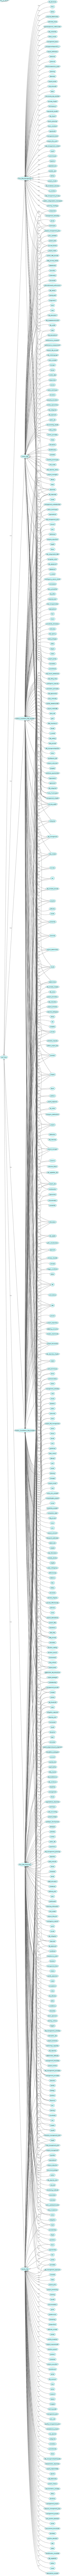

In [ ]:

image = io.imread('viz.JPG') 
image2 = io.imread('viz4.png') 
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image2)

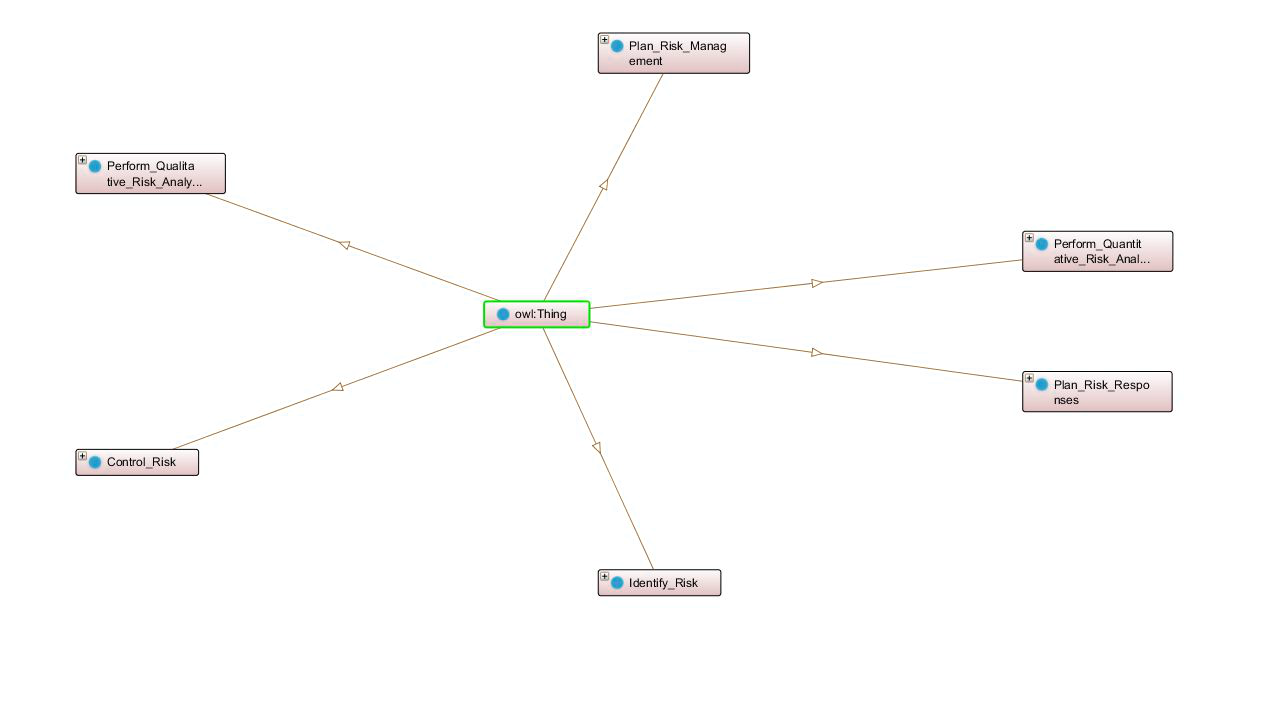

In [ ]:
cv2_imshow(image)

<h2>Step2: Building a Recommendation System </h2> 

In this part of the project we are going to build the knowledge based alogrithm that we are going to implement in our web application and that with the help of bthe strsumpy library

In [ ]:
pip install strsimpy

     |████████████████████████████████| 45 kB 3.3 MB/s 


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
import pandas as pd
from strsimpy.jaro_winkler import JaroWinkler #FAUT INSTALLER STRSIMPY avec PIP INSTALL

In [ ]:
dataframeinputstools=pd.read_csv("dataframeinputstools.csv")
dfsection=pd.read_csv("dfsection.csv")
dfprocess1=pd.read_csv('dfprocess1.csv')
dfprocess2=pd.read_csv('dfprocess2.csv')
dfprocess3=pd.read_csv('dfprocess3.csv')
dfprocess4=pd.read_csv('dfprocess4.csv')
dfprocess5=pd.read_csv('dfprocess5.csv')
dfprocess6=pd.read_csv('dfprocess6.csv')
fdfp=pd.read_csv('fdfp.csv')
dp=pd.read_csv("dp.csv")
dfprocesstotalstotals=pd.read_csv("dfprocesstotalstotals.csv")

In [ ]:
processpart=["Plan Risk Management","Identify Risk","Perform Qualitative Risk Analysis","Perform Quantitative Risk Analysis","Plan Risk Responses","Control Risk"]
frames2=[dfprocess1,dfprocess2,dfprocess3,dfprocess4,dfprocess5,dfprocess6]
requete='How can I plan a risk'
def answertorequest(requete,processpart,dataframeinputstools,dfprocesstotalstotals):
    test=False
    concept2=''
    requete=re.sub("[^a-zA-Z ]","",requete)
    requete=requete.lower()
    requete
    y=nlp(requete)
    
    LNOUN=[]
    for k in y:
        if k.pos_=='NOUN'or k.pos_=="VERB" or k.pos_=="PROPN" or k.pos_=="ADJ":
            LNOUN.append(k.text)
    
    print(LNOUN)
    answer=''
    ch=''
    for k in LNOUN:
        ch+=k+' '
    ch=ch.lstrip().rstrip()
    
    index=-1
    if 'input' in requete:
        for i in range(len(processpart)):
            if processpart[i].lower() in ch:
                index=i
        ch3=""
        for s in range(len(fdfp)):
            if fdfp.loc[s,'Process_Name'] == processpart[index].lower() and fdfp.loc[s,'Type']=='Has_inputs':
                ch3+=fdfp.loc[s,'Concept']+", "
        answer="The inputs of the process "+processpart[index]+" are "+ ch3
        answer+="\n"
        answer+=" SEE ALSO: Section "+dfsection.loc[4*index+1,"section"]+" "+dfsection.loc[4*index+1,"secabout"]+" Page "+str(dfsection.loc[4*index+1,"sectionpage"])
        test=True
    elif 'output' in requete:
        for i in range(len(processpart)):
            if processpart[i].lower() in ch:
                index=i
                print(index)
        ch3=""
        for s in range(len(fdfp)):
            if fdfp.loc[s,'Process_Name']==processpart[index].lower() and fdfp.loc[s,'Type']=='Has_outputs':
                ch3+=fdfp.loc[s,'Concept']+", "
        answer="The outputs of the process "+ processpart[index]+ " are "+ch3
        answer+='\n'
        answer+= " SEE ALSO: Section "+dfsection.loc[4*index+3,'section']+" "+dfsection.loc[4*index+3,'secabout']+" Page "+str(dfsection.loc[4*index+3,'sectionpage'])
        test=True
    elif 'tool' in requete or 'technique' in requete:
        for i in range(len(processpart)):
            if processpart[i].lower() in ch:
                index=i
        ch3=''
        for s in range(len(fdfp)):
            if fdfp.loc[s,'Process_Name']==processpart[index].lower() and fdfp.loc[s,'Type']=='Has_Technics_Tools':
                ch3+=fdfp.loc[s,'Concept']+", "
        answer="The tools&techniques of the process "+processpart[index]+" are "+ch3
        answer+="\n"
        answer+=" SEE ALSO: Section "+dfsection.loc[4*index+2,"section"]+" "+dfsection.loc[4*index+2,"secabout"]+" Page "+str(dfsection.loc[4*index+2,"sectionpage"])
        test=True
        
    elif 'definition' in requete:
        for i in range(len(processpart)):
            if processpart[i].lower() in ch :
                index=i
        answer="The definition of the process "+processpart[index]+" is "+frames2[index].loc[0,'sentence']
        answer+="\n"
        answer+="SEE ALSO: Section "+dfsection.loc[4*index,"section"]+" "+dfsection.loc[4*index,"secabout"]+" Page "+str(dfsection.loc[4*index,"sectionpage"])
        
        type(answer)
        test=True
    
    if test==False:
        for i in range(len(processpart)):
            if processpart[i].lower() in ch :
                index=i
                test=True
        if test==True:
            print(type(answer))
            answer="The definition of the process "+processpart[index]+" is4 "+ frames2[index].loc[0,'sentence']
            answer+=" \n "
            answer+="SEE ALSO: Section "+dfsection.loc[4*index,"section"]+" "+dfsection.loc[4*index,"secabout"]+" Page "+str(dfsection.loc[4*index,"sectionpage"])
    
    if test==False:
        for i in range(len(fdfp)):
            concept=fdfp.loc[i,'Concept']
            if concept in ch:
                concept2=concept
                test=True
                answer+='The definition of '+concept+' is '+ fdfp.loc[i,'Definition']+'\n'
                if fdfp.loc[i,'Type']=='Has_inputs':
                    answer+='It is an input of the process '+fdfp.loc[i,'Process_Name']+'\n'
                elif fdfp.loc[i,'Type']=='Has_outputs':
                    answer+='It is an output of the process '+fdfp.loc[i,'Process_Name']+'\n'
                else:
                    answer+='It is a tool & technique of the process '+fdfp.loc[i,'Process_Name']+'\n'
        answer+="\n"
        cptx=0
        for i in range(len(dp)):
            if concept2==dp.loc[i,"Domaine"] and cptx<1:
                cptx+=1
                answer+='SEE ALSO Section '+ dp.loc[i,"Range"]+"\n"
                break
    
    
    if test==False:
        ch2=""
        LNOUN2=[]
        for k in LNOUN:
            y=nlp(requete)
            for k in y:
                if k.pos_ in['NOUN',"VERB","PROPN"] and k.text not in ["has","have"]:
                    LNOUN2.append(k.text)
        for k in LNOUN2:
            ch2+=k+" "
        ch2=ch2.lstrip().rstrip()
        
        jarowinkler=JaroWinkler()
        L_score=[]
        for i in range(len(dfprocesstotalstotals)):
            x=jarowinkler.similarity(dfprocesstotalstotals.loc[i,"Subject"],requete)
            L_score.append(x)
        dfscore=pd.DataFrame(list(zip(L_score,dfprocesstotalstotals.loc[:,0])),columns=['score','sentence'])
        dfscore=dfscore.sort_values(by='score',ascending=False)
        
        L_answer=[]
        for i in range(len(dfscore)):
            x=dfscore.loc[i,"score"]
            if x>0.9:
                L_answer.append(dfscore.loc[i,"sentence"])
                test=True
                
        L_answerclean=[]
        for l in L_answer:
            if l not in L_answerclean:
                L_answerclean.append(l)
        
        cpt=0
        for l in L_answerclean:
            if cpt<5:
                answer+=l+" "+'\n'
                cpt+=1
    if test==False:
        L_answer=[]
        for i in range(len(dfscore)):
            
            x=dfscore.loc[i,"score"]
            if x>0.6:
                L_answer.append(dfscore.loc[i,"sentence"])
                test=True
                
        L_answerclean=[]
        for l in L_answer:
            if l not in L_answerclean:
                L_answerclean.append(l)
        
        cpt=0
        answer="The closest answer to your request is: \n"
        for l in L_answerclean:
            if cpt<5:
                answer+=l+" "+'\n'
                cpt+=1
    
    if test==False:
        answer="your request isn't clear enough! TRY AGAIN"
        
    
        
        
        
        
        
        
    
        
        
        
        
        
        
                    
        
        
    
                    
                    
        
                
                
        
        
            
        

        
            
        
    
    return(answer)


print(answertorequest(requete,processpart,dataframeinputstools,dfprocesstotalstotals))